# 10 rECENT LAGS

In [ ]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df


# Define the number of lag terms
num_lags = 10

# Create lag features for each column in the dataset
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    lagged_features = df.shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()



# Display the first few rows
print(lagged_df.head())
lagged_df
df = lagged_df
df

###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



                     PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                   
2013-01-11 00:00:00  4.66           99.63     29.12     23.62  86.93   
2013-01-12 00:00:00  0.12           99.78     28.37     22.74  84.92   
2013-01-13 00:00:00  0.01           99.76     27.12     21.67  82.59   
2013-01-14 00:00:00  0.00           99.70     27.71     20.57  80.37   
2013-01-15 00:00:00  0.01           99.77     27.99     21.08  81.07   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER  WS10M    WD_sin  ...  \
Date                                                                      ...   
2013-01-11 00:00:00      26.1       1010.5          6.0   5.95  0.498488  ...   
2013-01-12 00:00:00      27.2       1011.4          4.0   5.80  0.493942  ...   
2013-01-13 00:00:00      26.2       1010.3          5.0   5.64  0.559193  ...   
2013-01-14 00:00:00      25.9       1010.5          4.0   4.46  0.658689  ...   
2013-01-1

## RF with 10 Lags of each feature

### Optuna

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the objective function for optimization
def objective(trial):
    # Optimized parameter space (bootstrap removed)
    n_estimators = trial.suggest_int('n_estimators', 50, 200, step=50)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 7)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Define the model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict the values
    y_test_pred = rf_model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) on test set
    test_mse = mean_squared_error(y_test, y_test_pred)

    return test_mse  # Minimize the test set MSE

# Set up the Optuna study using TPE Sampler
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=50)

# Get the best parameters found by Optuna
best_params = study.best_params
print(f"\n✅ Best Parameters Found by Optuna:\n{best_params}")

# Use the best model for final prediction
best_rf_optuna = RandomForestRegressor(**best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)

# Make predictions
y_train_pred_optuna = best_rf_optuna.predict(X_train)
y_test_pred_optuna = best_rf_optuna.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
train_mse_optuna = mean_squared_error(y_train, y_train_pred_optuna)
test_mse_optuna = mean_squared_error(y_test, y_test_pred_optuna)

train_mae_optuna = mean_absolute_error(y_train, y_train_pred_optuna)
test_mae_optuna = mean_absolute_error(y_test, y_test_pred_optuna)

train_rmse_optuna = np.sqrt(train_mse_optuna)
test_rmse_optuna = np.sqrt(test_mse_optuna)

# R-squared (coefficient of determination)
train_r2_optuna = r2_score(y_train, y_train_pred_optuna)
test_r2_optuna = r2_score(y_test, y_test_pred_optuna)

# Avoid division by zero in MAPE
train_mape_optuna = np.mean(np.abs((y_train - y_train_pred_optuna) / np.maximum(y_train, 1e-8))) * 100
test_mape_optuna = np.mean(np.abs((y_test - y_test_pred_optuna) / np.maximum(y_test, 1e-8))) * 100

# Print metrics
print("\n📊 Evaluation Metrics:")
print(f"Train MSE: {train_mse_optuna:.4f}, Test MSE: {test_mse_optuna:.4f}")
print(f"Train MAE: {train_mae_optuna:.4f}, Test MAE: {test_mae_optuna:.4f}")
print(f"Train RMSE: {train_rmse_optuna:.4f}, Test RMSE: {test_rmse_optuna:.4f}")
print(f"Train MAPE: {train_mape_optuna:.2f}%, Test MAPE: {test_mape_optuna:.2f}%")
print(f"Train R²: {train_r2_optuna:.4f}, Test R²: {test_r2_optuna:.4f}")

# Create DataFrame from study
optuna_results = study.trials_dataframe()

# Extract relevant columns (bootstrap removed)
cols_to_extract = [
    'number', 'value',
    'params_n_estimators', 'params_max_depth', 'params_min_samples_split',
    'params_min_samples_leaf', 'params_max_features'
]

optuna_table_df = optuna_results[cols_to_extract]

# Rename for display
optuna_table_df.columns = [
    'Trial', 'Test MSE', 'n_estimators', 'max_depth', 'min_samples_split',
    'min_samples_leaf', 'max_features'
]

# Create Plotly Table
fig_table_optuna = go.Figure(data=[go.Table(
    header=dict(values=list(optuna_table_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[optuna_table_df[col] for col in optuna_table_df.columns],
               fill_color='lavender',
               align='left'))
])

fig_table_optuna.update_layout(
    title="Optuna Results - Random Forest Hyperparameter Tuning (No Bootstrap)",
    height=600,
    template='plotly_white'
)

fig_table_optuna.show()


[I 2025-07-07 06:35:13,438] A new study created in memory with name: no-name-01c813a6-8484-46eb-b41c-2881a882dd21
[I 2025-07-07 06:35:28,820] Trial 0 finished with value: 0.7684242087486888 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7684242087486888.
[I 2025-07-07 06:35:37,201] Trial 1 finished with value: 0.7818243567366003 and parameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7684242087486888.
[I 2025-07-07 06:35:50,470] Trial 2 finished with value: 0.86175573792323 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.7684242087486888.
[I 2025-07-07 06:35:57,105] Trial 3 finished with value: 0.866660172833407 and parameters: {'n_estimators': 150, 'max_depth': 30, 'm


✅ Best Parameters Found by Optuna:
{'n_estimators': 150, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}

📊 Evaluation Metrics:
Train MSE: 0.1075, Test MSE: 0.6139
Train MAE: 0.2365, Test MAE: 0.6019
Train RMSE: 0.3279, Test RMSE: 0.7835
Train MAPE: 6.74%, Test MAPE: 16.49%
Train R²: 0.9574, Test R²: 0.7454


In [ ]:
train_mse_optuna

0.10751056787045206

In [ ]:
import plotly.graph_objects as go

# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred_optuna, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred_optuna, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
# Evaluate the model performance
train_mse_optuna
test_mse_optuna

train_mae_optuna
test_mae_optuna

train_rmse_optuna
test_rmse_optuna

# Mean Absolute Percentage Error (MAPE)
train_mape_optuna
test_mape_optuna

np.float64(16.4946871496356)

### Original

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit with desired number of splits (e.g., 5)
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics for each fold
train_mse_list, test_mse_list = [], []
train_mae_list, test_mae_list = [], []
train_rmse_list, test_rmse_list = [], []
train_mape_list, test_mape_list = [], []
train_r2_list, test_r2_list = [], []

# Time series cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mape = np.mean(np.abs((y_train - y_train_pred) / np.maximum(y_train, 1e-8))) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / np.maximum(y_test, 1e-8))) * 100

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append results for each fold
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

# Calculate average metrics over all folds and assign to variables
Original_Train_MSE = np.mean(train_mse_list)
Original_Test_MSE = np.mean(test_mse_list)

Original_Train_MAE = np.mean(train_mae_list)
Original_Test_MAE = np.mean(test_mae_list)

Original_Train_RMSE = np.mean(train_rmse_list)
Original_Test_RMSE = np.mean(test_rmse_list)

Original_Train_MAPE = np.mean(train_mape_list)
Original_Test_MAPE = np.mean(test_mape_list)

Original_Train_R2 = np.mean(train_r2_list)
Original_Test_R2 = np.mean(test_r2_list)

# Print the assigned values
print(f"\n📊 Cross-Validated Average Metrics:")
print(f"Train MSE: {Original_Train_MSE:.4f}, Test MSE: {Original_Test_MSE:.4f}")
print(f"Train MAE: {Original_Train_MAE:.4f}, Test MAE: {Original_Test_MAE:.4f}")
print(f"Train RMSE: {Original_Train_RMSE:.4f}, Test RMSE: {Original_Test_RMSE:.4f}")
print(f"Train MAPE: {Original_Train_MAPE:.2f}%, Test MAPE: {Original_Test_MAPE:.2f}%")
print(f"Train R²: {Original_Train_R2:.4f}, Test R²: {Original_Test_R2:.4f}")



📊 Cross-Validated Average Metrics:
Train MSE: 0.0709, Test MSE: 0.6086
Train MAE: 0.2039, Test MAE: 0.5972
Train RMSE: 0.2662, Test RMSE: 0.7795
Train MAPE: 5.84%, Test MAPE: 16.97%
Train R²: 0.9715, Test R²: 0.7530


In [ ]:
import plotly.graph_objects as go

# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


### Grid Search CV HYper Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define parameter grid (bootstrap removed)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Valid options only
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# TimeSeriesSplit ensures training precedes testing in time
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Extract best parameters and model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf_grid = grid_search.best_estimator_

# Predict with best model
y_train_pred_grid = best_rf_grid.predict(X_train)
y_test_pred_grid = best_rf_grid.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred_grid)
test_mse = mean_squared_error(y_test, y_test_pred_grid)

train_mae = mean_absolute_error(y_train, y_train_pred_grid)
test_mae = mean_absolute_error(y_test, y_test_pred_grid)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred_grid)
test_r2 = r2_score(y_test, y_test_pred_grid)

# Handle division by zero in MAPE
train_mape = np.mean(np.abs((y_train - y_train_pred_grid) / np.maximum(y_train, 1e-8))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred_grid) / np.maximum(y_test, 1e-8))) * 100

# Output results
print(f"✅ Best Hyperparameters: {best_params}")
print(f"📉 Best CV Score (Negative MSE): {best_score:.4f}")
print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAPE: {train_mape:.2f}%, Test MAPE: {test_mape:.2f}%")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
✅ Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
📉 Best CV Score (Negative MSE): -0.6035
Train MSE: 0.1314, Test MSE: 0.5598
Train MAE: 0.2598, Test MAE: 0.5753
Train RMSE: 0.3625, Test RMSE: 0.7482
Train MAPE: 7.45%, Test MAPE: 15.28%
Train R²: 0.9474, Test R²: 0.7743


In [ ]:
# Calculate and print evaluation metrics
grid_train_mse =train_mse
grid_test_mse =test_mse
grid_train_mae = train_mae
grid_test_mae =test_mae
grid_train_rmse = train_rmse
grid_test_rmse = test_rmse
grid_train_mape = train_mape
grid_test_mape = test_mape

In [ ]:
import plotly.graph_objects as go
# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred_grid, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred_grid, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


### Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the Random Forest Regressor model with fixed random seed
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {

    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
            # Whether bootstrap samples are used when building trees
}

# Set up the TimeSeriesSplit object for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up RandomizedSearchCV with random_state and TimeSeriesSplit
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42,       # Fixed random seed here
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
random_best_params = random_search.best_params_
random_best_rf = random_search.best_estimator_

print(f"Best Parameters: {random_best_params}")

# Make predictions on train and test sets
y_train_pred_random = random_best_rf.predict(X_train)
y_test_pred_random = random_best_rf.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
random_train_mse = mean_squared_error(y_train, y_train_pred_random)
random_test_mse = mean_squared_error(y_test, y_test_pred_random)

random_train_mae = mean_absolute_error(y_train, y_train_pred_random)
random_test_mae = mean_absolute_error(y_test, y_test_pred_random)

random_train_rmse = np.sqrt(random_train_mse)
random_test_rmse = np.sqrt(random_test_mse)

random_train_mape = np.mean(np.abs((y_train - y_train_pred_random) / np.maximum(y_train, 1e-8))) * 100
random_test_mape = np.mean(np.abs((y_test - y_test_pred_random) / np.maximum(y_test, 1e-8))) * 100

# R-squared
random_train_r2 = r2_score(y_train, y_train_pred_random)
random_test_r2 = r2_score(y_test, y_test_pred_random)

# Print metrics
print(f"Random Train MSE: {random_train_mse:.4f}, Random Test MSE: {random_test_mse:.4f}")
print(f"Random Train MAE: {random_train_mae:.4f}, Random Test MAE: {random_test_mae:.4f}")
print(f"Random Train RMSE: {random_train_rmse:.4f}, Random Test RMSE: {random_test_rmse:.4f}")
print(f"Random Train MAPE: {random_train_mape:.2f}%, Random Test MAPE: {random_test_mape:.2f}%")
print(f"Random Train R²: {random_train_r2:.4f}, Random Test R²: {random_test_r2:.4f}")

# Create a DataFrame from the random search results
random_search_results = pd.DataFrame(random_search.cv_results_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Random Train MSE: 0.0859, Random Test MSE: 0.7242
Random Train MAE: 0.2298, Random Test MAE: 0.6549
Random Train RMSE: 0.2932, Random Test RMSE: 0.8510
Random Train MAPE: 6.82%, Random Test MAPE: 17.75%
Random Train R²: 0.9656, Random Test R²: 0.7081


In [ ]:
import plotly.graph_objects as go
y_train_pred=y_train_pred_random
y_test_pred=y_test_pred_random
# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd

# Define the model evaluation results
results = {
    "Model": ["Original", "Grid Search CV", "Random Search CV", "Optuna"],
    "Train MSE": [Original_Train_MSE, grid_train_mse, random_train_mse, train_mse_optuna],
    "Test MSE": [Original_Test_MSE, grid_test_mse, random_test_mse, test_mse_optuna],
    "Train MAE": [Original_Train_MAE, grid_train_mae, random_train_mae, train_mae_optuna],
    "Test MAE": [Original_Test_MAE, grid_test_mae, random_test_mae, test_mae_optuna],
    "Train RMSE": [Original_Train_RMSE, grid_train_rmse, random_train_rmse, train_rmse_optuna],
    "Test RMSE": [Original_Test_RMSE, grid_test_rmse, random_test_rmse, test_rmse_optuna],
    "Train MAPE (%)": [Original_Train_MAPE, grid_train_mape, random_train_mape, train_mape_optuna],
    "Test MAPE (%)": [Original_Test_MAPE, grid_test_mape, random_test_mape, test_mape_optuna],
}

# Convert dictionary to Pandas DataFrame
df_results = pd.DataFrame(results)

# Print the title
print("\n" + "="*40)
print("Variable Set 1 - Random Forest Modelling")
print("="*40 + "\n")

# Display the table
print(df_results)

# Save the DataFrame to a CSV file
df_results.to_csv("variableSet_1_random_forest_results.csv", index=False)

print("\nResults saved to 'variableSet_1_random_forest_results.csv'")



Variable Set 1 - Random Forest Modelling

              Model  Train MSE  Test MSE  Train MAE  Test MAE  Train RMSE  \
0          Original   0.070942  0.608565   0.203913  0.597178    0.266241   
1    Grid Search CV   0.131420  0.559815   0.259825  0.575263    0.362519   
2  Random Search CV   0.085943  0.724160   0.229777  0.654887    0.293160   
3            Optuna   0.107511  0.613924   0.236480  0.601943    0.327888   

   Test RMSE  Train MAPE (%)  Test MAPE (%)  
0   0.779548        5.841425      16.969620  
1   0.748208        7.449761      15.279742  
2   0.850976        6.816148      17.748653  
3   0.783533        6.737442      16.494687  

Results saved to 'variableSet_1_random_forest_results.csv'


## XGB  with 10 Lags of each feature

In [ ]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df.columns



Index(['PREC', 'SURF_PRESSSURE', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP',
       'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos',
       'MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon'],
      dtype='object')

In [ ]:
monsoon_cols=['MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon']
df[monsoon_cols]=df[monsoon_cols].astype(int)

In [ ]:

# Define the number of lag terms
num_lags = 10

# Create lag features for each column in the dataset
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    lagged_features = df.shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()



# Display the first few rows
print(lagged_df.head())
lagged_df
df = lagged_df
df

                     PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                   
2013-01-11 00:00:00  4.66           99.63     29.12     23.62  86.93   
2013-01-12 00:00:00  0.12           99.78     28.37     22.74  84.92   
2013-01-13 00:00:00  0.01           99.76     27.12     21.67  82.59   
2013-01-14 00:00:00  0.00           99.70     27.71     20.57  80.37   
2013-01-15 00:00:00  0.01           99.77     27.99     21.08  81.07   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER  WS10M    WD_sin  ...  \
Date                                                                      ...   
2013-01-11 00:00:00      26.1       1010.5          6.0   5.95  0.498488  ...   
2013-01-12 00:00:00      27.2       1011.4          4.0   5.80  0.493942  ...   
2013-01-13 00:00:00      26.2       1010.3          5.0   5.64  0.559193  ...   
2013-01-14 00:00:00      25.9       1010.5          4.0   4.46  0.658689  ...   
2013-01-1

PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                    
2013-01-11 00:00:00   4.66           99.63     29.12     23.62  86.93   
2013-01-12 00:00:00   0.12           99.78     28.37     22.74  84.92   
2013-01-13 00:00:00   0.01           99.76     27.12     21.67  82.59   
2013-01-14 00:00:00   0.00           99.70     27.71     20.57  80.37   
2013-01-15 00:00:00   0.01           99.77     27.99     21.08  81.07   
...                    ...             ...       ...       ...    ...   
2023-12-27 00:00:00   9.45           99.66     30.35     24.40  88.57   
2023-12-28 00:00:00  13.93           99.58     29.37     25.51  90.59   
2023-12-29 00:00:00   9.80           99.69     29.30     25.03  89.03   
2023-12-30 00:00:00   9.98           99.67     29.54     24.71  87.47   
2023-12-31 00:00:00  14.96           99.69     30.03     24.10  86.37   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER  WS10M    WD_sin  ...  \
Date                                                                      ...   
2013-01-11 00:00:00      26.1       1010.5          6.0   5.95  0.498488  ...   
2013-01-12 00:00:00      27.2       1011.4          4.0   5.80  0.493942  ...   
2013-01-13 00:00:00      26.2       1010.3          5.0   5.64  0.559193  ...   
2013-01-14 00:00:00      25.9       1010.5          4.0   4.46  0.658689  ...   
2013-01-15 00:00:00      27.1       1011.1          3.0   4.71  0.710799  ...   
...                       ...          ...          ...    ...       ...  ...   
2023-12-27 00:00:00      29.5       1011.0          5.0   6.43  0.381070  ...   
2023-12-28 00:00:00      28.5       1010.9          7.0   3.93  0.634731  ...   
2023-12-29 00:00:00      28.2       1011.4          7.0   2.59  0.689620  ...   
2023-12-30 00:00:00      28.4       1010.9          6.0   4.59  0.564967  ...   
2023-12-31 00:00:00      28.6       1010.9          6.0   5.08  0.569280  ...   

                     RH_lag10  AVG_TEMP_lag10  SL_PRESSURE_lag10  \
Date                                                               
2013-01-11 00:00:00     85.13            28.5             1009.2   
2013-01-12 00:00:00     86.19            27.6             1010.4   
2013-01-13 00:00:00     86.26            26.4             1011.0   
2013-01-14 00:00:00     86.31            25.1             1010.1   
2013-01-15 00:00:00     86.88            26.9             1007.5   
...                       ...             ...                ...   
2023-12-27 00:00:00     86.40            28.0             1009.2   
2023-12-28 00:00:00     83.68            28.1             1010.9   
2023-12-29 00:00:00     85.56            28.8             1010.7   
2023-12-30 00:00:00     87.96            28.6             1010.6   
2023-12-31 00:00:00     84.68            28.1             1010.9   

                     CLOUD_COVER_lag10  WS10M_lag10  WD_sin_lag10  \
Date                                                                
2013-01-11 00:00:00                5.0         3.99      0.600420   
2013-01-12 00:00:00                5.0         4.25      0.500000   
2013-01-13 00:00:00                8.0         4.75      0.439939   
2013-01-14 00:00:00                8.0         5.74      0.424199   
2013-01-15 00:00:00                8.0         5.79      0.563526   
...                                ...          ...           ...   
2023-12-27 00:00:00                4.0         3.39      0.712026   
2023-12-28 00:00:00                7.0         2.30      0.958323   
2023-12-29 00:00:00                6.0         4.01      0.607376   
2023-12-30 00:00:00                5.0         3.76      0.634731   
2023-12-31 00:00:00                5.0         2.38      0.740805   

                     WD_cos_lag10  MONOSOON_SEASON_Northeast_Monsoon_lag10  \
Date                                                                         
2013-01-11 00:00:00      0.799685                                      1.0   
2

In [ ]:


###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train:
                     PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                   
2013-01-11 00:00:00  4.66           99.63     29.12     23.62  86.93   
2013-01-12 00:00:00  0.12           99.78     28.37     22.74  84.92   
2013-01-13 00:00:00  0.01           99.76     27.12     21.67  82.59   
2013-01-14 00:00:00  0.00           99.70     27.71     20.57  80.37   
2013-01-15 00:00:00  0.01           99.77     27.99     21.08  81.07   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER    WD_sin    WD_cos  \
Date                                                                          
2013-01-11 00:00:00      26.1       1010.5          6.0  0.498488  0.866897   
2013-01-12 00:00:00      27.2       1011.4          4.0  0.493942  0.869495   
2013-01-13 00:00:00      26.2       1010.3          5.0  0.559193  0.829038   
2013-01-14 00:00:00      25.9       1010.5          4.0  0.658689  0.752415   
2013-01-15 0

### Original

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import random

random.seed(42)
np.random.seed(42)
# Initialize the model (XGBoost Regressor) with fixed random seed
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit (deterministic, no random seed needed)
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics for each fold
train_mse_list, test_mse_list = [], []
train_mae_list, test_mae_list = [], []
train_rmse_list, test_rmse_list = [], []
train_mape_list, test_mape_list = [], []
# Initialize R2 score lists (missing in your code)
train_r2_list, test_r2_list = [], []

# Time series cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    xgb.fit(X_train, y_train)

    # Predict
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    train_r2 = r2_score(y_train, y_train_pred)    # Added
    test_r2 = r2_score(y_test, y_test_pred)       # Added
    # Append
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_r2_list.append(train_r2)      # Added
    test_r2_list.append(test_r2)
# Average metrics across folds
print(f"Average Train MSE: {np.mean(train_mse_list):.4f}, Average Test MSE: {np.mean(test_mse_list):.4f}")
print(f"Average Train MAE: {np.mean(train_mae_list):.4f}, Average Test MAE: {np.mean(test_mae_list):.4f}")
print(f"Average Train RMSE: {np.mean(train_rmse_list):.4f}, Average Test RMSE: {np.mean(test_rmse_list):.4f}")
print(f"Average Train MAPE: {np.mean(train_mape_list):.4f}%, Average Test MAPE: {np.mean(test_mape_list):.4f}%")
print(f"Average Train R^2: {np.mean(train_r2_list):.4f}, Average Test R^2: {np.mean(test_r2_list):.4f}")   # Added

Average Train MSE: 0.0015, Average Test MSE: 0.6310
Average Train MAE: 0.0216, Average Test MAE: 0.6114
Average Train RMSE: 0.0296, Average Test RMSE: 0.7941
Average Train MAPE: 0.6045%, Average Test MAPE: 17.1204%
Average Train R^2: 0.9994, Average Test R^2: 0.7440


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Convert y_train and y_test to DataFrame
y_train_df = pd.DataFrame({"Train Actual": y_train, "Train Predicted": y_train_pred}, index=X_train.index)
y_test_df = pd.DataFrame({"Test Actual": y_test, "Test Predicted": y_test_pred}, index=X_test.index)

# Concatenate train and test sets for a single time series view
df_combined = pd.concat([y_train_df, y_test_df], axis=0)

# Create the interactive plot
fig = go.Figure()

# Plot training actual values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train, mode='lines',
    name='Train Actual', line=dict(color='blue')
))

# Plot training predicted values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train_pred, mode='lines',
    name='Train Predicted', line=dict(color='cyan', dash='dot')
))

# Plot test actual values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test, mode='lines',
    name='Test Actual', line=dict(color='red')
))

# Plot test predicted values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test_pred, mode='lines',
    name='Test Predicted', line=dict(color='green', dash='dot')
))

# Customize layout
fig.update_layout(
    title="Time Series Forecasting - Actual vs Predicted",
    xaxis_title="Time",
    yaxis_title="Wind Speed",
    hovermode="x",
    template="plotly_white",
    legend=dict(x=0, y=1)
)

# Show the figure
fig.show()


In [ ]:
# Assign values to new variables
original_train_mse = train_mse
original_test_mse = test_mse

original_train_mae = train_mae
original_test_mae = test_mae

original_train_rmse = train_rmse
original_test_rmse = test_rmse

original_train_mape = train_mape
original_test_mape = test_mape

# Print results
print(f"Train MSE: {original_train_mse:.4f}, Test MSE: {original_test_mse:.4f}")
print(f"Train MAE: {original_train_mae:.4f}, Test MAE: {original_test_mae:.4f}")
print(f"Train RMSE: {original_train_rmse:.4f}, Test RMSE: {original_test_rmse:.4f}")
print(f"Train MAPE: {original_train_mape:.4f}%, Test MAPE: {original_test_mape:.4f}%")


Train MSE: 0.0051, Test MSE: 0.6180
Train MAE: 0.0522, Test MAE: 0.6080
Train RMSE: 0.0715, Test RMSE: 0.7861
Train MAPE: 1.4511%, Test MAPE: 15.7648%


### Grid Search CV HYper Parameter tuning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
random.seed(42)
np.random.seed(42)
# Define the XGBoost Regressor model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid with reduced parameters for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 150, 300],
    'max_depth': [3, 8, 12],
    'gamma': [0, 0.05, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.05,0.3],
    'min_child_weight': [1,3, 5]      # Step size shrinking to prevent overfitting
}

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
grid_best_params = grid_search.best_params_
print(f"Best Parameters: {grid_best_params}")

# Get the best estimator (XGBoost model with optimal parameters)
grid_best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred_grid = grid_best_xgb.predict(X_train)
y_test_pred_grid = grid_best_xgb.predict(X_test)


# Evaluate the model performance
grid_train_mse = mean_squared_error(y_train, y_train_pred_grid)
grid_test_mse = mean_squared_error(y_test, y_test_pred_grid)

grid_train_mae = mean_absolute_error(y_train, y_train_pred_grid)
grid_test_mae = mean_absolute_error(y_test, y_test_pred_grid)

grid_train_rmse = np.sqrt(grid_train_mse)
grid_test_rmse = np.sqrt(grid_test_mse)

# Mean Absolute Percentage Error (MAPE)
grid_train_mape = np.mean(np.abs((y_train - y_train_pred_grid) / y_train)) * 100
grid_test_mape = np.mean(np.abs((y_test - y_test_pred_grid) / y_test)) * 100

# R-squared
grid_train_r2 = r2_score(y_train, y_train_pred_grid)
grid_test_r2 = r2_score(y_test, y_test_pred_grid)

# Print the evaluation metrics
print(f"Grid Train MSE: {grid_train_mse:.4f}, Grid Test MSE: {grid_test_mse:.4f}")
print(f"Grid Train MAE: {grid_train_mae:.4f}, Grid Test MAE: {grid_test_mae:.4f}")
print(f"Grid Train RMSE: {grid_train_rmse:.4f}, Grid Test RMSE: {grid_test_rmse:.4f}")
print(f"Grid Train MAPE: {grid_train_mape:.4f}%, Grid Test MAPE: {grid_test_mape:.4f}%")
print(f"Grid Train R^2: {grid_train_r2:.4f}, Grid Test R^2: {grid_test_r2:.4f}")



Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Grid Train MSE: 0.2868, Grid Test MSE: 0.5353
Grid Train MAE: 0.4217, Grid Test MAE: 0.5612
Grid Train RMSE: 0.5355, Grid Test RMSE: 0.7316
Grid Train MAPE: 11.8638%, Grid Test MAPE: 14.7058%
Grid Train R^2: 0.8852, Grid Test R^2: 0.7842


In [ ]:
# Get the best parameters from the grid search
grid_best_params = grid_search.best_params_
print(f"Best Parameters: {grid_best_params}")

Best Parameters: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Store evaluation metrics in a dictionary
grid_search_metrics = {
    "grid_train_mse": grid_train_mse,
    "grid_test_mse": grid_test_mse,
    "grid_train_mae": grid_train_mae,
    "grid_test_mae": grid_test_mae,
    "grid_train_rmse": grid_train_rmse,
    "grid_test_rmse": grid_test_rmse,
    "grid_train_mape": grid_train_mape,
    "grid_test_mape": grid_test_mape
}

# Print stored values
for metric, value in grid_search_metrics.items():
    print(f"{metric}: {value:.4f}")


grid_train_mse: 0.2868
grid_test_mse: 0.5353
grid_train_mae: 0.4217
grid_test_mae: 0.5612
grid_train_rmse: 0.5355
grid_test_rmse: 0.7316
grid_train_mape: 11.8638
grid_test_mape: 14.7058


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Convert y_train and y_test to DataFrame
y_train_df = pd.DataFrame({"Train Actual": y_train, "Train Predicted": y_train_pred_grid}, index=X_train.index)
y_test_df = pd.DataFrame({"Test Actual": y_test, "Test Predicted": y_test_pred_grid}, index=X_test.index)

# Concatenate train and test sets for a single time series view
df_combined = pd.concat([y_train_df, y_test_df], axis=0)

# Create the interactive plot
fig = go.Figure()

# Plot training actual values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train, mode='lines',
    name='Train Actual', line=dict(color='blue')
))

# Plot training predicted values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train_pred_grid, mode='lines',
    name='Train Predicted', line=dict(color='cyan', dash='dot')
))

# Plot test actual values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test, mode='lines',
    name='Test Actual', line=dict(color='red')
))

# Plot test predicted values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test_pred_grid, mode='lines',
    name='Test Predicted', line=dict(color='green', dash='dot')
))

# Customize layout
fig.update_layout(
    title="Time Series Forecasting: Actual vs Predicted",
    xaxis_title="Time",
    yaxis_title="Target Value",
    template="plotly_white",
    hovermode="x",
    legend=dict(x=0, y=1)
)

# Show interactive plot
fig.show()


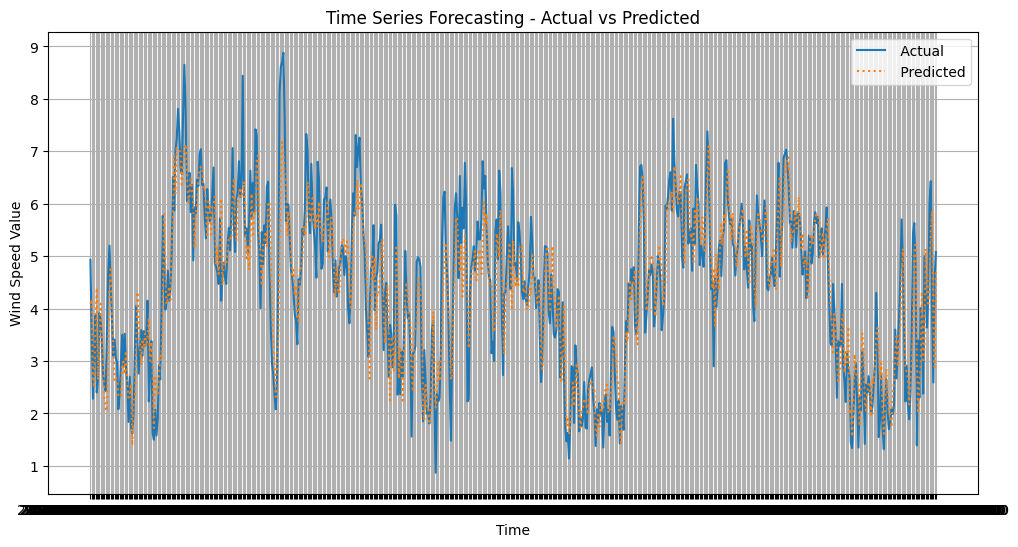

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot test actual values
plt.plot(y_test.index, y_test, label=' Actual')

# Plot test predicted values
plt.plot(y_test.index, y_test_pred_grid, label=' Predicted',linestyle='dotted')

# Customize layout
plt.title("Time Series Forecasting - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Wind Speed Value")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


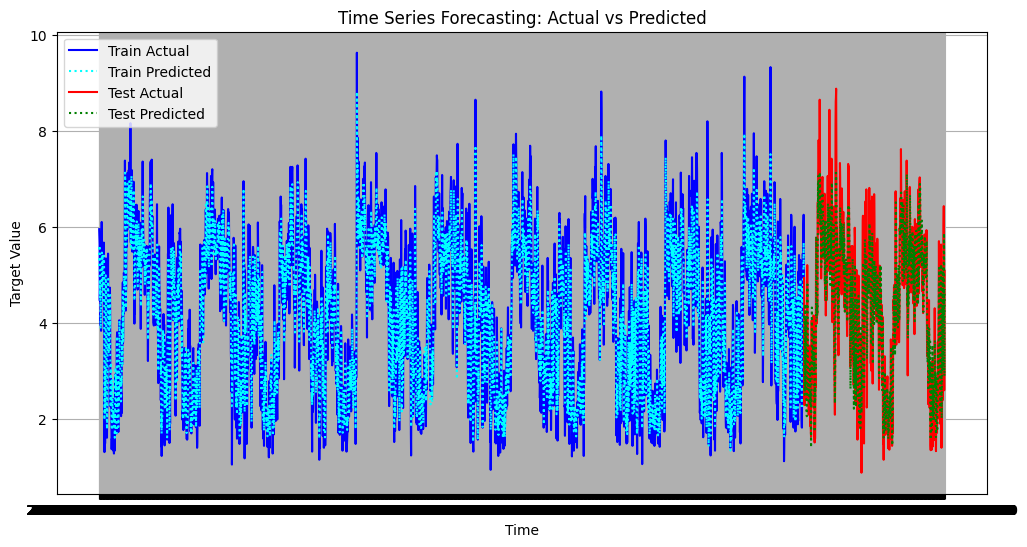

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot training actual values
plt.plot(y_train.index, y_train, label='Train Actual', color='blue')

# Plot training predicted values
plt.plot(y_train.index, y_train_pred_grid, label='Train Predicted', color='cyan', linestyle='dotted')

# Plot test actual values
plt.plot(y_test.index, y_test, label='Test Actual', color='red')

# Plot test predicted values
plt.plot(y_test.index, y_test_pred_grid, label='Test Predicted', color='green', linestyle='dotted')

# Customize layout
plt.title("Time Series Forecasting: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Random Search CV

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go
random.seed(42)
np.random.seed(42)
# Initialize XGBRegressor with random seed for reproducibility
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 150, 300],
    'max_depth': [3, 8, 12],
    'gamma': [0, 0.05, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.05,0.3],
    'min_child_weight': [1,3, 5]    # Step size shrinking
}

# TimeSeriesSplit (deterministic, no seed needed)
tscv = TimeSeriesSplit(n_splits=5)

# RandomizedSearchCV with fixed random_state for reproducible search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42  # Fix the random seed here for reproducibility
)

# Fit the model and perform hyperparameter search
random_search.fit(X_train, y_train)

# Best hyperparameters found
random_best_params = random_search.best_params_
print(f"Best Parameters: {random_best_params}")

# Best model from search
random_best_xgb = random_search.best_estimator_

# Predictions on train and test
y_train_pred_random = random_best_xgb.predict(X_train)
y_test_pred_random = random_best_xgb.predict(X_test)

# Calculate evaluation metrics
random_train_mse = mean_squared_error(y_train, y_train_pred_random)
random_test_mse = mean_squared_error(y_test, y_test_pred_random)
random_train_mae = mean_absolute_error(y_train, y_train_pred_random)
random_test_mae = mean_absolute_error(y_test, y_test_pred_random)
random_train_rmse = np.sqrt(random_train_mse)
random_test_rmse = np.sqrt(random_test_mse)
random_train_mape = np.mean(np.abs((y_train - y_train_pred_random) / y_train)) * 100
random_test_mape = np.mean(np.abs((y_test - y_test_pred_random) / y_test)) * 100

random_train_r2 = r2_score(y_train, y_train_pred_random)
random_test_r2 = r2_score(y_test, y_test_pred_random)


# Print evaluation metrics
print(f"Random Train MSE: {random_train_mse:.4f}, Random Test MSE: {random_test_mse:.4f}")
print(f"Random Train MAE: {random_train_mae:.4f}, Random Test MAE: {random_test_mae:.4f}")
print(f"Random Train RMSE: {random_train_rmse:.4f}, Random Test RMSE: {random_test_rmse:.4f}")
print(f"Random Train MAPE: {random_train_mape:.4f}%, Random Test MAPE: {random_test_mape:.4f}%")
print(f"Random Train R^2: {random_train_r2:.4f}, Random Test R^2: {random_test_r2:.4f}")
# Create a DataFrame of results
random_search_results = pd.DataFrame(random_search.cv_results_)

# Select relevant columns to display
random_table_df = random_search_results[[
    'param_n_estimators', 'param_max_depth', 'param_gamma',
    'param_subsample', 'param_learning_rate',
    'mean_test_score', 'std_test_score'
]]

# Rename columns for readability
random_table_df.columns = [
    'n_estimators', 'max_depth', 'gamma', 'subsample', 'learning_rate',
    'mean_test_score', 'std_test_score'
]

# Create a Plotly table visualization
fig_table = go.Figure(go.Table(
    header=dict(values=random_table_df.columns),
    cells=dict(values=[random_table_df[col].tolist() for col in random_table_df.columns])
))

fig_table.update_layout(
    title="Time Series Cross-Validation Results - Hyperparameter Tuning",
    template="plotly_white",
    height=500
)

fig_table.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0}
Random Train MSE: 0.0029, Random Test MSE: 0.5401
Random Train MAE: 0.0399, Random Test MAE: 0.5668
Random Train RMSE: 0.0537, Random Test RMSE: 0.7349
Random Train MAPE: 1.1208%, Random Test MAPE: 14.7803%
Random Train R^2: 0.9988, Random Test R^2: 0.7823


In [ ]:
# Create a dictionary to store the error values
error_metrics = {
    'Random Train MSE': random_train_mse,
    'Random Test MSE': random_test_mse,
    'Random Train MAE': random_train_mae,
    'Random Test MAE': random_test_mae,
    'Random Train RMSE': random_train_rmse,
    'Random Test RMSE': random_test_rmse,
    'Random Train MAPE': random_train_mape,
    'Random Test MAPE': random_test_mape
}

# Convert the error metrics dictionary to a DataFrame for better presentation
error_df = pd.DataFrame(list(error_metrics.items()), columns=['Metric', 'Value'])

# Print the error metrics
print(error_df)

# Create an interactive table for the error metrics using plotly
fig_error_table = go.Figure(go.Table(
    header=dict(values=["Metric", "Value"]),
    cells=dict(values=[error_df['Metric'].tolist(), error_df['Value'].tolist()])
))

# Customize the layout for the error table
fig_error_table.update_layout(
    title="Error Metrics for RandomizedSearchCV",
    template="plotly_white",
    height=400
)

# Show the error table
fig_error_table.show()
import plotly.graph_objects as go

# Create an interactive plot for actual vs predicted values
fig = go.Figure()

# Add trace for training data
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train)),
    y=y_train,
    mode='markers',
    name='Actual y_train',
    marker=dict(color='blue', size=8)
))

fig.add_trace(go.Scatter(
    x=np.arange(len(y_train_pred_random)),
    y=y_train_pred_random,
    mode='markers',
    name='Predicted y_train',
    marker=dict(color='red', size=8)
))

# Add trace for test data
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)),
    y=y_test,
    mode='markers',
    name='Actual y_test',
    marker=dict(color='green', size=8)
))

fig.add_trace(go.Scatter(
    x=np.arange(len(y_test_pred_random)),
    y=y_test_pred_random,
    mode='markers',
    name='Predicted y_test',
    marker=dict(color='orange', size=8)
))

# Customize the layout
fig.update_layout(
    title="Actual vs Predicted Values for y_train and y_test",
    xaxis_title="Index",
    yaxis_title="Value",
    template="plotly_white",
    height=600,
    showlegend=True
)

# Show the plot
fig.show()


              Metric      Value
0   Random Train MSE   0.002883
1    Random Test MSE   0.540140
2   Random Train MAE   0.039886
3    Random Test MAE   0.566757
4  Random Train RMSE   0.053695
5   Random Test RMSE   0.734942
6  Random Train MAPE   1.120758
7   Random Test MAPE  14.780336


### Optuna Hyper Parameter tuning






In [ ]:
!pip install optuna


In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import random
import numpy as np
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import plotly.graph_objects as go

random.seed(42)
np.random.seed(42)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 5)
    gamma = trial.suggest_float('gamma', 0, 0.3)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)

    xgb_model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        objective='reg:squarederror',
        random_state=42
    )


    xgb_model.fit(X_train, y_train)

    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return test_mse

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Best Parameters: {best_params}")

best_xgb = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

y_train_pred_optuna = best_xgb.predict(X_train)
y_test_pred_optuna = best_xgb.predict(X_test)

# Evaluation metrics code continues...


from sklearn.metrics import r2_score

# Evaluate the model performance
train_mse_optuna = mean_squared_error(y_train, y_train_pred_optuna)
test_mse_optuna = mean_squared_error(y_test, y_test_pred_optuna)

train_mae_optuna = mean_absolute_error(y_train, y_train_pred_optuna)
test_mae_optuna = mean_absolute_error(y_test, y_test_pred_optuna)

train_rmse_optuna = np.sqrt(train_mse_optuna)
test_rmse_optuna = np.sqrt(test_mse_optuna)

# Mean Absolute Percentage Error (MAPE)
train_mape_optuna = np.mean(np.abs((y_train - y_train_pred_optuna) / y_train)) * 100
test_mape_optuna = np.mean(np.abs((y_test - y_test_pred_optuna) / y_test)) * 100

# R-squared
train_r2_optuna = r2_score(y_train, y_train_pred_optuna)
test_r2_optuna = r2_score(y_test, y_test_pred_optuna)

# Print the evaluation metrics
print(f"Optuna Train MSE: {train_mse_optuna:.4f}, Optuna Test MSE: {test_mse_optuna:.4f}")
print(f"Optuna Train MAE: {train_mae_optuna:.4f}, Optuna Test MAE: {test_mae_optuna:.4f}")
print(f"Optuna Train RMSE: {train_rmse_optuna:.4f}, Optuna Test RMSE: {test_rmse_optuna:.4f}")
print(f"Optuna Train MAPE: {train_mape_optuna:.4f}%, Optuna Test MAPE: {test_mape_optuna:.4f}%")
print(f"Optuna Train R^2: {train_r2_optuna:.4f}, Optuna Test R^2: {test_r2_optuna:.4f}")

# Create a DataFrame from the study results
optuna_results = pd.DataFrame(study.trials_dataframe())

# Extract relevant columns to display in the table
optuna_table_df = optuna_results[[
    'number', 'params_n_estimators', 'params_max_depth', 'params_learning_rate',
    'params_min_child_weight', 'value'
]]

# Rename columns for better readability
optuna_table_df.columns = [
    'Trial', 'n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'Test MSE'
]

# Create the table for Optuna results
fig_table_optuna = go.Figure(go.Table(
    header=dict(values=["Parameter", "Value"]),
    cells=dict(values=[
        optuna_table_df.columns,
        [optuna_table_df[column].tolist() for column in optuna_table_df.columns]
    ])
))

# Customize the table layout
fig_table_optuna.update_layout(
    title="Optuna Results - Hyperparameter Tuning (XGBoost)",
    template="plotly_white",
    height=500
)

# Show the table
fig_table_optuna.show()


[I 2025-07-07 15:25:08,898] A new study created in memory with name: no-name-995dc830-2f78-448d-8a64-5b8d2c8945d4
[I 2025-07-07 15:25:30,081] Trial 0 finished with value: 0.6015347427697548 and parameters: {'n_estimators': 150, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'min_child_weight': 3, 'gamma': 0.04680559213273095, 'subsample': 0.662397808134481}. Best is trial 0 with value: 0.6015347427697548.
[I 2025-07-07 15:25:55,876] Trial 1 finished with value: 0.5869562839391504 and parameters: {'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.07725378389307355, 'min_child_weight': 4, 'gamma': 0.006175348288740734, 'subsample': 0.9879639408647978}. Best is trial 1 with value: 0.5869562839391504.
[I 2025-07-07 15:26:01,550] Trial 2 finished with value: 0.5341925109383014 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.01855998084649059, 'min_child_weight': 1, 'gamma': 0.09127267288786131, 'subsample': 0.8099025726528951}. Best is trial 2 with valu

Best Parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.0944724979942804, 'min_child_weight': 1, 'gamma': 0.0734251601828654, 'subsample': 0.716842172867328}
Optuna Train MSE: 0.0976, Optuna Test MSE: 0.5125
Optuna Train MAE: 0.2453, Optuna Test MAE: 0.5474
Optuna Train RMSE: 0.3124, Optuna Test RMSE: 0.7159
Optuna Train MAPE: 6.8398%, Optuna Test MAPE: 14.2768%
Optuna Train R^2: 0.9609, Optuna Test R^2: 0.7934


In [ ]:
import plotly.graph_objects as go

# Create an interactive time series plot
fig = go.Figure()

# Add trace for training data (Actual)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train)),
    y=y_train,
    mode='lines',
    name='Actual y_train',
    line=dict(color='blue')
))

# Add trace for training data (Predicted)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train_pred_random)),
    y=y_train_pred_random,
    mode='lines',
    name='Predicted y_train',
    line=dict(color='red', dash='dash')
))

# Add trace for test data (Actual)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train), len(y_train) + len(y_test)),
    y=y_test,
    mode='lines',
    name='Actual y_test',
    line=dict(color='green')
))

# Add trace for test data (Predicted)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train), len(y_train) + len(y_test_pred_random)),
    y=y_test_pred_random,
    mode='lines',
    name='Predicted y_test',
    line=dict(color='orange', dash='dash')
))

# Customize the layout
fig.update_layout(
    title="Actual vs Predicted Values for y_train and y_test (Time Series)",
    xaxis_title="Time (Index)",
    yaxis_title="Value",
    template="plotly_white",
    height=600,
    showlegend=True
)

# Show the plot
fig.show()


# 14 RECENT LAGS

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df


# Define the number of lag terms
num_lags = 14

# Create lag features for each column in the dataset
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    lagged_features = df.shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()



# Display the first few rows
print(lagged_df.head())
lagged_df
df = lagged_df
df

###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



                     PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                   
2013-01-15 00:00:00  0.01           99.77     27.99     21.08  81.07   
2013-01-16 00:00:00  0.00           99.81     27.87     20.55  80.95   
2013-01-17 00:00:00  0.00           99.82     28.60     20.31  77.69   
2013-01-18 00:00:00  0.00           99.85     27.86     20.10  78.74   
2013-01-19 00:00:00  0.00           99.80     28.62     20.72  79.09   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER  WS10M    WD_sin  ...  \
Date                                                                      ...   
2013-01-15 00:00:00      27.1       1011.1          3.0   4.71  0.710799  ...   
2013-01-16 00:00:00      27.4       1011.4          1.0   5.33  0.680721  ...   
2013-01-17 00:00:00      26.9       1011.8          1.0   4.02  0.638768  ...   
2013-01-18 00:00:00      26.8       1012.2          2.0   3.94  0.575005  ...   
2013-01-1

In [ ]:
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

## RF with 14 Lags of each feature

### Optuna

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the objective function for optimization
def objective(trial):
    # Optimized parameter space (bootstrap removed)
    n_estimators = trial.suggest_int('n_estimators', 50, 200, step=50)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 7)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Define the model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict the values
    y_test_pred = rf_model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) on test set
    test_mse = mean_squared_error(y_test, y_test_pred)

    return test_mse  # Minimize the test set MSE

# Set up the Optuna study using TPE Sampler
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=50)

# Get the best parameters found by Optuna
best_params = study.best_params
print(f"\n✅ Best Parameters Found by Optuna:\n{best_params}")

# Use the best model for final prediction
best_rf_optuna = RandomForestRegressor(**best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)

# Make predictions
y_train_pred_optuna = best_rf_optuna.predict(X_train)
y_test_pred_optuna = best_rf_optuna.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
train_mse_optuna = mean_squared_error(y_train, y_train_pred_optuna)
test_mse_optuna = mean_squared_error(y_test, y_test_pred_optuna)

train_mae_optuna = mean_absolute_error(y_train, y_train_pred_optuna)
test_mae_optuna = mean_absolute_error(y_test, y_test_pred_optuna)

train_rmse_optuna = np.sqrt(train_mse_optuna)
test_rmse_optuna = np.sqrt(test_mse_optuna)

# R-squared (coefficient of determination)
train_r2_optuna = r2_score(y_train, y_train_pred_optuna)
test_r2_optuna = r2_score(y_test, y_test_pred_optuna)

# Avoid division by zero in MAPE
train_mape_optuna = np.mean(np.abs((y_train - y_train_pred_optuna) / np.maximum(y_train, 1e-8))) * 100
test_mape_optuna = np.mean(np.abs((y_test - y_test_pred_optuna) / np.maximum(y_test, 1e-8))) * 100

# Print metrics
print("\n📊 Evaluation Metrics:")
print(f"Train MSE: {train_mse_optuna:.4f}, Test MSE: {test_mse_optuna:.4f}")
print(f"Train MAE: {train_mae_optuna:.4f}, Test MAE: {test_mae_optuna:.4f}")
print(f"Train RMSE: {train_rmse_optuna:.4f}, Test RMSE: {test_rmse_optuna:.4f}")
print(f"Train MAPE: {train_mape_optuna:.2f}%, Test MAPE: {test_mape_optuna:.2f}%")
print(f"Train R²: {train_r2_optuna:.4f}, Test R²: {test_r2_optuna:.4f}")

# Create DataFrame from study
optuna_results = study.trials_dataframe()

# Extract relevant columns (bootstrap removed)
cols_to_extract = [
    'number', 'value',
    'params_n_estimators', 'params_max_depth', 'params_min_samples_split',
    'params_min_samples_leaf', 'params_max_features'
]

optuna_table_df = optuna_results[cols_to_extract]

# Rename for display
optuna_table_df.columns = [
    'Trial', 'Test MSE', 'n_estimators', 'max_depth', 'min_samples_split',
    'min_samples_leaf', 'max_features'
]

# Create Plotly Table
fig_table_optuna = go.Figure(data=[go.Table(
    header=dict(values=list(optuna_table_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[optuna_table_df[col] for col in optuna_table_df.columns],
               fill_color='lavender',
               align='left'))
])

fig_table_optuna.update_layout(
    title="Optuna Results - Random Forest Hyperparameter Tuning (No Bootstrap)",
    height=600,
    template='plotly_white'
)

fig_table_optuna.show()


[I 2025-07-07 06:49:10,129] A new study created in memory with name: no-name-403551c1-895e-43b1-901f-80c72900ba66
[I 2025-07-07 06:49:13,035] Trial 0 finished with value: 0.8282967698038054 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8282967698038054.
[I 2025-07-07 06:49:14,518] Trial 1 finished with value: 0.8356925446052277 and parameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8282967698038054.
[I 2025-07-07 06:49:17,993] Trial 2 finished with value: 0.941954859195156 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.8282967698038054.
[I 2025-07-07 06:49:20,332] Trial 3 finished with value: 0.9357275546777539 and parameters: {'n_estimators': 150, 'max_depth': 30, 


✅ Best Parameters Found by Optuna:
{'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None}

📊 Evaluation Metrics:
Train MSE: 0.1324, Test MSE: 0.6300
Train MAE: 0.2601, Test MAE: 0.6108
Train RMSE: 0.3639, Test RMSE: 0.7937
Train MAPE: 7.42%, Test MAPE: 16.74%
Train R²: 0.9475, Test R²: 0.7388


In [ ]:
train_mse_optuna

0.13244751601062404

In [ ]:
import plotly.graph_objects as go

# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred_optuna, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred_optuna, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
# Evaluate the model performance
train_mse_optuna
test_mse_optuna

train_mae_optuna
test_mae_optuna

train_rmse_optuna
test_rmse_optuna

# Mean Absolute Percentage Error (MAPE)
train_mape_optuna
test_mape_optuna

np.float64(16.736291640056596)

### Original

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit with desired number of splits (e.g., 5)
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics for each fold
train_mse_list, test_mse_list = [], []
train_mae_list, test_mae_list = [], []
train_rmse_list, test_rmse_list = [], []
train_mape_list, test_mape_list = [], []
train_r2_list, test_r2_list = [], []

# Time series cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mape = np.mean(np.abs((y_train - y_train_pred) / np.maximum(y_train, 1e-8))) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / np.maximum(y_test, 1e-8))) * 100

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append results for each fold
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

# Calculate average metrics over all folds and assign to variables
Original_Train_MSE = np.mean(train_mse_list)
Original_Test_MSE = np.mean(test_mse_list)

Original_Train_MAE = np.mean(train_mae_list)
Original_Test_MAE = np.mean(test_mae_list)

Original_Train_RMSE = np.mean(train_rmse_list)
Original_Test_RMSE = np.mean(test_rmse_list)

Original_Train_MAPE = np.mean(train_mape_list)
Original_Test_MAPE = np.mean(test_mape_list)

Original_Train_R2 = np.mean(train_r2_list)
Original_Test_R2 = np.mean(test_r2_list)

# Print the assigned values
print(f"\n📊 Cross-Validated Average Metrics:")
print(f"Train MSE: {Original_Train_MSE:.4f}, Test MSE: {Original_Test_MSE:.4f}")
print(f"Train MAE: {Original_Train_MAE:.4f}, Test MAE: {Original_Test_MAE:.4f}")
print(f"Train RMSE: {Original_Train_RMSE:.4f}, Test RMSE: {Original_Test_RMSE:.4f}")
print(f"Train MAPE: {Original_Train_MAPE:.2f}%, Test MAPE: {Original_Test_MAPE:.2f}%")
print(f"Train R²: {Original_Train_R2:.4f}, Test R²: {Original_Test_R2:.4f}")



📊 Cross-Validated Average Metrics:
Train MSE: 0.0705, Test MSE: 0.6145
Train MAE: 0.2036, Test MAE: 0.6033
Train RMSE: 0.2654, Test RMSE: 0.7835
Train MAPE: 5.84%, Test MAPE: 17.16%
Train R²: 0.9717, Test R²: 0.7506


In [ ]:
import plotly.graph_objects as go

# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


### Grid Search CV HYper Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define parameter grid (bootstrap removed)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Valid options only
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# TimeSeriesSplit ensures training precedes testing in time
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Extract best parameters and model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf_grid = grid_search.best_estimator_

# Predict with best model
y_train_pred_grid = best_rf_grid.predict(X_train)
y_test_pred_grid = best_rf_grid.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred_grid)
test_mse = mean_squared_error(y_test, y_test_pred_grid)

train_mae = mean_absolute_error(y_train, y_train_pred_grid)
test_mae = mean_absolute_error(y_test, y_test_pred_grid)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred_grid)
test_r2 = r2_score(y_test, y_test_pred_grid)

# Handle division by zero in MAPE
train_mape = np.mean(np.abs((y_train - y_train_pred_grid) / np.maximum(y_train, 1e-8))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred_grid) / np.maximum(y_test, 1e-8))) * 100

# Output results
print(f"✅ Best Hyperparameters: {best_params}")
print(f"📉 Best CV Score (Negative MSE): {best_score:.4f}")
print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAPE: {train_mape:.2f}%, Test MAPE: {test_mape:.2f}%")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
✅ Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
📉 Best CV Score (Negative MSE): -0.6048
Train MSE: 0.1422, Test MSE: 0.5816
Train MAE: 0.2698, Test MAE: 0.5896
Train RMSE: 0.3771, Test RMSE: 0.7627
Train MAPE: 7.74%, Test MAPE: 15.68%
Train R²: 0.9431, Test R²: 0.7655


In [ ]:
# Calculate and print evaluation metrics
grid_train_mse =train_mse
grid_test_mse =test_mse
grid_train_mae = train_mae
grid_test_mae =test_mae
grid_train_rmse = train_rmse
grid_test_rmse = test_rmse
grid_train_mape = train_mape
grid_test_mape = test_mape

In [ ]:
import plotly.graph_objects as go
# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred_grid, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred_grid, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


### Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the Random Forest Regressor model with fixed random seed
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {

    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
            # Whether bootstrap samples are used when building trees
}

# Set up the TimeSeriesSplit object for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up RandomizedSearchCV with random_state and TimeSeriesSplit
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42,       # Fixed random seed here
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
random_best_params = random_search.best_params_
random_best_rf = random_search.best_estimator_

print(f"Best Parameters: {random_best_params}")

# Make predictions on train and test sets
y_train_pred_random = random_best_rf.predict(X_train)
y_test_pred_random = random_best_rf.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
random_train_mse = mean_squared_error(y_train, y_train_pred_random)
random_test_mse = mean_squared_error(y_test, y_test_pred_random)

random_train_mae = mean_absolute_error(y_train, y_train_pred_random)
random_test_mae = mean_absolute_error(y_test, y_test_pred_random)

random_train_rmse = np.sqrt(random_train_mse)
random_test_rmse = np.sqrt(random_test_mse)

random_train_mape = np.mean(np.abs((y_train - y_train_pred_random) / np.maximum(y_train, 1e-8))) * 100
random_test_mape = np.mean(np.abs((y_test - y_test_pred_random) / np.maximum(y_test, 1e-8))) * 100

# R-squared
random_train_r2 = r2_score(y_train, y_train_pred_random)
random_test_r2 = r2_score(y_test, y_test_pred_random)

# Print metrics
print(f"Random Train MSE: {random_train_mse:.4f}, Random Test MSE: {random_test_mse:.4f}")
print(f"Random Train MAE: {random_train_mae:.4f}, Random Test MAE: {random_test_mae:.4f}")
print(f"Random Train RMSE: {random_train_rmse:.4f}, Random Test RMSE: {random_test_rmse:.4f}")
print(f"Random Train MAPE: {random_train_mape:.2f}%, Random Test MAPE: {random_test_mape:.2f}%")
print(f"Random Train R²: {random_train_r2:.4f}, Random Test R²: {random_test_r2:.4f}")

# Create a DataFrame from the random search results
random_search_results = pd.DataFrame(random_search.cv_results_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Random Train MSE: 0.1411, Random Test MSE: 0.7659
Random Train MAE: 0.2893, Random Test MAE: 0.6748
Random Train RMSE: 0.3756, Random Test RMSE: 0.8752
Random Train MAPE: 8.61%, Random Test MAPE: 18.25%
Random Train R²: 0.9435, Random Test R²: 0.6912


In [ ]:
import plotly.graph_objects as go
y_train_pred=y_train_pred_random
y_test_pred=y_test_pred_random
# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd

# Define the model evaluation results
results = {
    "Model": ["Original", "Grid Search CV", "Random Search CV", "Optuna"],
    "Train MSE": [Original_Train_MSE, grid_train_mse, random_train_mse, train_mse_optuna],
    "Test MSE": [Original_Test_MSE, grid_test_mse, random_test_mse, test_mse_optuna],
    "Train MAE": [Original_Train_MAE, grid_train_mae, random_train_mae, train_mae_optuna],
    "Test MAE": [Original_Test_MAE, grid_test_mae, random_test_mae, test_mae_optuna],
    "Train RMSE": [Original_Train_RMSE, grid_train_rmse, random_train_rmse, train_rmse_optuna],
    "Test RMSE": [Original_Test_RMSE, grid_test_rmse, random_test_rmse, test_rmse_optuna],
    "Train MAPE (%)": [Original_Train_MAPE, grid_train_mape, random_train_mape, train_mape_optuna],
    "Test MAPE (%)": [Original_Test_MAPE, grid_test_mape, random_test_mape, test_mape_optuna],
}

# Convert dictionary to Pandas DataFrame
df_results = pd.DataFrame(results)

# Print the title
print("\n" + "="*40)
print("Variable Set 1 - Random Forest Modelling")
print("="*40 + "\n")

# Display the table
print(df_results)

# Save the DataFrame to a CSV file
df_results.to_csv("variableSet_1_random_forest_results.csv", index=False)

print("\nResults saved to 'variableSet_1_random_forest_results.csv'")



Variable Set 1 - Random Forest Modelling

              Model  Train MSE  Test MSE  Train MAE  Test MAE  Train RMSE  \
0          Original   0.070489  0.614486   0.203563  0.603284    0.265363   
1    Grid Search CV   0.142204  0.581635   0.269832  0.589591    0.377100   
2  Random Search CV   0.141087  0.765895   0.289270  0.674769    0.375616   
3            Optuna   0.132448  0.630020   0.260138  0.610780    0.363933   

   Test RMSE  Train MAPE (%)  Test MAPE (%)  
0   0.783488        5.844703      17.158682  
1   0.762650        7.741877      15.676055  
2   0.875154        8.612228      18.246800  
3   0.793738        7.415229      16.736292  

Results saved to 'variableSet_1_random_forest_results.csv'


## XGB  with 14 Lags of each feature

In [ ]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df

df.columns
# List of monsoon season columns
monsoon_cols = [
    'MONOSOON_SEASON_Northeast_Monsoon',
    'MONOSOON_SEASON_Second_Inter_Monsoon',
    'MONOSOON_SEASON_Southwest_Monsoon'
]

# Convert True/False to 1/0
df[monsoon_cols] = df[monsoon_cols].astype(int)

df


# Define the number of lag terms
num_lags = 14

# Create lag features for each column in the dataset
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    lagged_features = df.shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()



# Display the first few rows
print(lagged_df.head())
lagged_df
df = lagged_df
df

###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 9.4 MB/s eta 0:00:00
                     PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                   
2013-01-15 00:00:00  0.01           99.77     27.99     21.08  81.07   
2013-01-16 00:00:00  0.00           99.81     27.87     20.55  80.95   
2013-01-17 00:00:00  0.00           99.82     28.60     20.31  77.69   
2013-01-18 00:00:00  0.00           99.85     27.86     20.10  78.74   
2013-01-19 00:00:00  0.00           99.80     28.62     20.72  79.09   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER  WS10M    WD_sin  ...  \
Date                                                                      ...   
2013-01-15 00:00:00      27.1       1011.1          3.0   4.71  0.710799  ...   
2013-01-16 00:00:00      27.4       1011.4          1.0   5.33  0.680721  ...   
2013-01-17 

### Original

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


import random
import numpy as np
import tensorflow as tf

# Set a global seed for reproducibility
SEED = 42

# Set seeds for all major libraries
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

random.seed(42)
np.random.seed(42)
# Initialize the model (XGBoost Regressor) with fixed random seed
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit (deterministic, no random seed needed)
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics for each fold
train_mse_list, test_mse_list = [], []
train_mae_list, test_mae_list = [], []
train_rmse_list, test_rmse_list = [], []
train_mape_list, test_mape_list = [], []
# Initialize R2 score lists (missing in your code)
train_r2_list, test_r2_list = [], []

# Time series cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    xgb.fit(X_train, y_train)

    # Predict
    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    train_r2 = r2_score(y_train, y_train_pred)    # Added
    test_r2 = r2_score(y_test, y_test_pred)       # Added
    # Append
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_r2_list.append(train_r2)      # Added
    test_r2_list.append(test_r2)
# Average metrics across folds
print(f"Average Train MSE: {np.mean(train_mse_list):.4f}, Average Test MSE: {np.mean(test_mse_list):.4f}")
print(f"Average Train MAE: {np.mean(train_mae_list):.4f}, Average Test MAE: {np.mean(test_mae_list):.4f}")
print(f"Average Train RMSE: {np.mean(train_rmse_list):.4f}, Average Test RMSE: {np.mean(test_rmse_list):.4f}")
print(f"Average Train MAPE: {np.mean(train_mape_list):.4f}%, Average Test MAPE: {np.mean(test_mape_list):.4f}%")
print(f"Average Train R^2: {np.mean(train_r2_list):.4f}, Average Test R^2: {np.mean(test_r2_list):.4f}")   # Added

Average Train MSE: 0.0013, Average Test MSE: 0.6330
Average Train MAE: 0.0202, Average Test MAE: 0.6111
Average Train RMSE: 0.0276, Average Test RMSE: 0.7953
Average Train MAPE: 0.5663%, Average Test MAPE: 17.2810%
Average Train R^2: 0.9995, Average Test R^2: 0.7432


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Convert y_train and y_test to DataFrame
y_train_df = pd.DataFrame({"Train Actual": y_train, "Train Predicted": y_train_pred}, index=X_train.index)
y_test_df = pd.DataFrame({"Test Actual": y_test, "Test Predicted": y_test_pred}, index=X_test.index)

# Concatenate train and test sets for a single time series view
df_combined = pd.concat([y_train_df, y_test_df], axis=0)

# Create the interactive plot
fig = go.Figure()

# Plot training actual values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train, mode='lines',
    name='Train Actual', line=dict(color='blue')
))

# Plot training predicted values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train_pred, mode='lines',
    name='Train Predicted', line=dict(color='cyan', dash='dot')
))

# Plot test actual values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test, mode='lines',
    name='Test Actual', line=dict(color='red')
))

# Plot test predicted values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test_pred, mode='lines',
    name='Test Predicted', line=dict(color='green', dash='dot')
))

# Customize layout
fig.update_layout(
    title="Time Series Forecasting - Actual vs Predicted",
    xaxis_title="Time",
    yaxis_title="Wind Speed",
    hovermode="x",
    template="plotly_white",
    legend=dict(x=0, y=1)
)

# Show the figure
fig.show()


In [ ]:
# Assign values to new variables
original_train_mse = train_mse
original_test_mse = test_mse

original_train_mae = train_mae
original_test_mae = test_mae

original_train_rmse = train_rmse
original_test_rmse = test_rmse

original_train_mape = train_mape
original_test_mape = test_mape

# Print results
print(f"Train MSE: {original_train_mse:.4f}, Test MSE: {original_test_mse:.4f}")
print(f"Train MAE: {original_train_mae:.4f}, Test MAE: {original_test_mae:.4f}")
print(f"Train RMSE: {original_train_rmse:.4f}, Test RMSE: {original_test_rmse:.4f}")
print(f"Train MAPE: {original_train_mape:.4f}%, Test MAPE: {original_test_mape:.4f}%")


Train MSE: 0.0045, Test MSE: 0.6067
Train MAE: 0.0489, Test MAE: 0.5953
Train RMSE: 0.0672, Test RMSE: 0.7789
Train MAPE: 1.3671%, Test MAPE: 15.1975%


### Grid Search CV HYper Parameter tuning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
random.seed(42)
np.random.seed(42)
# Define the XGBoost Regressor model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid with reduced parameters for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 150, 300],
    'max_depth': [3, 8, 12],
    'gamma': [0, 0.05, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.05,0.3],
    'min_child_weight': [1,3, 5]      # Step size shrinking to prevent overfitting
}

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
grid_best_params = grid_search.best_params_
print(f"Best Parameters: {grid_best_params}")

# Get the best estimator (XGBoost model with optimal parameters)
grid_best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred_grid = grid_best_xgb.predict(X_train)
y_test_pred_grid = grid_best_xgb.predict(X_test)


# Evaluate the model performance
grid_train_mse = mean_squared_error(y_train, y_train_pred_grid)
grid_test_mse = mean_squared_error(y_test, y_test_pred_grid)

grid_train_mae = mean_absolute_error(y_train, y_train_pred_grid)
grid_test_mae = mean_absolute_error(y_test, y_test_pred_grid)

grid_train_rmse = np.sqrt(grid_train_mse)
grid_test_rmse = np.sqrt(grid_test_mse)

# Mean Absolute Percentage Error (MAPE)
grid_train_mape = np.mean(np.abs((y_train - y_train_pred_grid) / y_train)) * 100
grid_test_mape = np.mean(np.abs((y_test - y_test_pred_grid) / y_test)) * 100

# R-squared
grid_train_r2 = r2_score(y_train, y_train_pred_grid)
grid_test_r2 = r2_score(y_test, y_test_pred_grid)

# Print the evaluation metrics
print(f"Grid Train MSE: {grid_train_mse:.4f}, Grid Test MSE: {grid_test_mse:.4f}")
print(f"Grid Train MAE: {grid_train_mae:.4f}, Grid Test MAE: {grid_test_mae:.4f}")
print(f"Grid Train RMSE: {grid_train_rmse:.4f}, Grid Test RMSE: {grid_test_rmse:.4f}")
print(f"Grid Train MAPE: {grid_train_mape:.4f}%, Grid Test MAPE: {grid_test_mape:.4f}%")
print(f"Grid Train R^2: {grid_train_r2:.4f}, Grid Test R^2: {grid_test_r2:.4f}")



Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Grid Train MSE: 0.2801, Grid Test MSE: 0.5362
Grid Train MAE: 0.4184, Grid Test MAE: 0.5602
Grid Train RMSE: 0.5292, Grid Test RMSE: 0.7322
Grid Train MAPE: 11.8284%, Grid Test MAPE: 14.6634%
Grid Train R^2: 0.8879, Grid Test R^2: 0.7838


In [ ]:
# Get the best parameters from the grid search
grid_best_params = grid_search.best_params_
print(f"Best Parameters: {grid_best_params}")

Best Parameters: {'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Store evaluation metrics in a dictionary
grid_search_metrics = {
    "grid_train_mse": grid_train_mse,
    "grid_test_mse": grid_test_mse,
    "grid_train_mae": grid_train_mae,
    "grid_test_mae": grid_test_mae,
    "grid_train_rmse": grid_train_rmse,
    "grid_test_rmse": grid_test_rmse,
    "grid_train_mape": grid_train_mape,
    "grid_test_mape": grid_test_mape
}

# Print stored values
for metric, value in grid_search_metrics.items():
    print(f"{metric}: {value:.4f}")


grid_train_mse: 0.2801
grid_test_mse: 0.5362
grid_train_mae: 0.4184
grid_test_mae: 0.5602
grid_train_rmse: 0.5292
grid_test_rmse: 0.7322
grid_train_mape: 11.8284
grid_test_mape: 14.6634


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Convert y_train and y_test to DataFrame
y_train_df = pd.DataFrame({"Train Actual": y_train, "Train Predicted": y_train_pred_grid}, index=X_train.index)
y_test_df = pd.DataFrame({"Test Actual": y_test, "Test Predicted": y_test_pred_grid}, index=X_test.index)

# Concatenate train and test sets for a single time series view
df_combined = pd.concat([y_train_df, y_test_df], axis=0)

# Create the interactive plot
fig = go.Figure()

# Plot training actual values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train, mode='lines',
    name='Train Actual', line=dict(color='blue')
))

# Plot training predicted values
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train_pred_grid, mode='lines',
    name='Train Predicted', line=dict(color='cyan', dash='dot')
))

# Plot test actual values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test, mode='lines',
    name='Test Actual', line=dict(color='red')
))

# Plot test predicted values
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test_pred_grid, mode='lines',
    name='Test Predicted', line=dict(color='green', dash='dot')
))

# Customize layout
fig.update_layout(
    title="Time Series Forecasting: Actual vs Predicted",
    xaxis_title="Time",
    yaxis_title="Target Value",
    template="plotly_white",
    hovermode="x",
    legend=dict(x=0, y=1)
)

# Show interactive plot
fig.show()


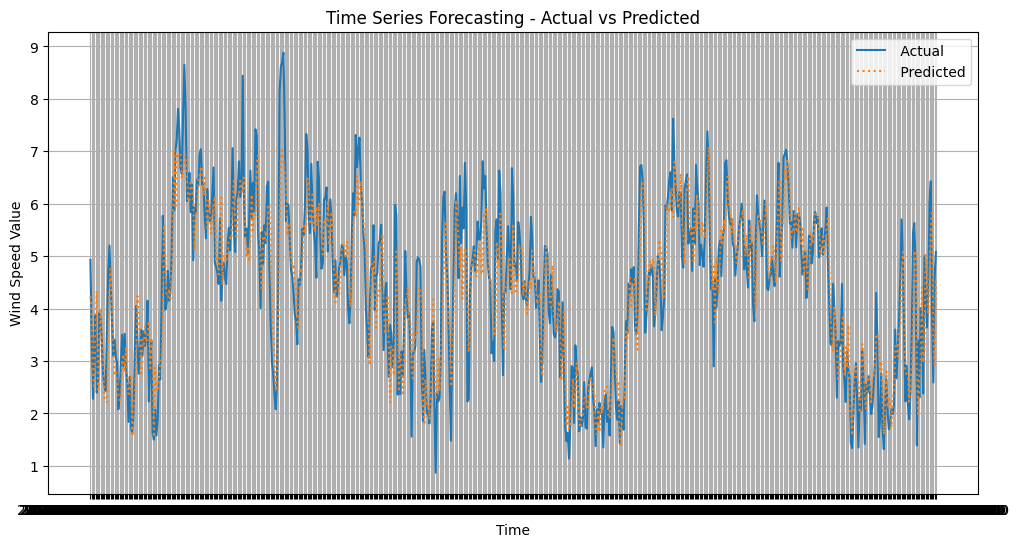

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot test actual values
plt.plot(y_test.index, y_test, label=' Actual')

# Plot test predicted values
plt.plot(y_test.index, y_test_pred_grid, label=' Predicted',linestyle='dotted')

# Customize layout
plt.title("Time Series Forecasting - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Wind Speed Value")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


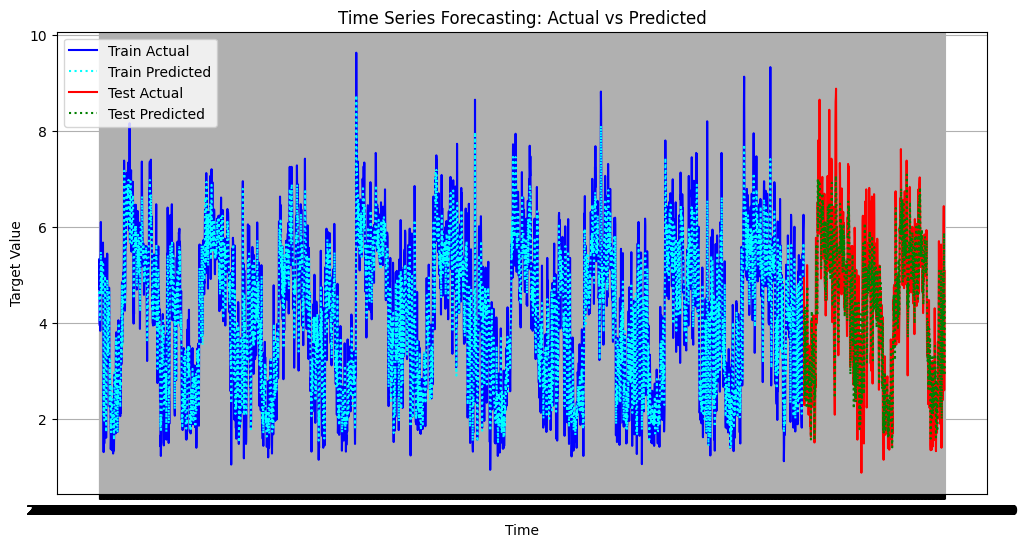

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot training actual values
plt.plot(y_train.index, y_train, label='Train Actual', color='blue')

# Plot training predicted values
plt.plot(y_train.index, y_train_pred_grid, label='Train Predicted', color='cyan', linestyle='dotted')

# Plot test actual values
plt.plot(y_test.index, y_test, label='Test Actual', color='red')

# Plot test predicted values
plt.plot(y_test.index, y_test_pred_grid, label='Test Predicted', color='green', linestyle='dotted')

# Customize layout
plt.title("Time Series Forecasting: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Random Search CV

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go
random.seed(42)
np.random.seed(42)
# Initialize XGBRegressor with random seed for reproducibility
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 150, 300],
    'max_depth': [3, 8, 12],
    'gamma': [0, 0.05, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.05,0.3],
    'min_child_weight': [1,3, 5]    # Step size shrinking
}

# TimeSeriesSplit (deterministic, no seed needed)
tscv = TimeSeriesSplit(n_splits=5)

# RandomizedSearchCV with fixed random_state for reproducible search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42  # Fix the random seed here for reproducibility
)

# Fit the model and perform hyperparameter search
random_search.fit(X_train, y_train)

# Best hyperparameters found
random_best_params = random_search.best_params_
print(f"Best Parameters: {random_best_params}")

# Best model from search
random_best_xgb = random_search.best_estimator_

# Predictions on train and test
y_train_pred_random = random_best_xgb.predict(X_train)
y_test_pred_random = random_best_xgb.predict(X_test)

# Calculate evaluation metrics
random_train_mse = mean_squared_error(y_train, y_train_pred_random)
random_test_mse = mean_squared_error(y_test, y_test_pred_random)
random_train_mae = mean_absolute_error(y_train, y_train_pred_random)
random_test_mae = mean_absolute_error(y_test, y_test_pred_random)
random_train_rmse = np.sqrt(random_train_mse)
random_test_rmse = np.sqrt(random_test_mse)
random_train_mape = np.mean(np.abs((y_train - y_train_pred_random) / y_train)) * 100
random_test_mape = np.mean(np.abs((y_test - y_test_pred_random) / y_test)) * 100

random_train_r2 = r2_score(y_train, y_train_pred_random)
random_test_r2 = r2_score(y_test, y_test_pred_random)


# Print evaluation metrics
print(f"Random Train MSE: {random_train_mse:.4f}, Random Test MSE: {random_test_mse:.4f}")
print(f"Random Train MAE: {random_train_mae:.4f}, Random Test MAE: {random_test_mae:.4f}")
print(f"Random Train RMSE: {random_train_rmse:.4f}, Random Test RMSE: {random_test_rmse:.4f}")
print(f"Random Train MAPE: {random_train_mape:.4f}%, Random Test MAPE: {random_test_mape:.4f}%")
print(f"Random Train R^2: {random_train_r2:.4f}, Random Test R^2: {random_test_r2:.4f}")
# Create a DataFrame of results
random_search_results = pd.DataFrame(random_search.cv_results_)

# Select relevant columns to display
random_table_df = random_search_results[[
    'param_n_estimators', 'param_max_depth', 'param_gamma',
    'param_subsample', 'param_learning_rate',
    'mean_test_score', 'std_test_score'
]]

# Rename columns for readability
random_table_df.columns = [
    'n_estimators', 'max_depth', 'gamma', 'subsample', 'learning_rate',
    'mean_test_score', 'std_test_score'
]

# Create a Plotly table visualization
fig_table = go.Figure(go.Table(
    header=dict(values=random_table_df.columns),
    cells=dict(values=[random_table_df[col].tolist() for col in random_table_df.columns])
))

fig_table.update_layout(
    title="Time Series Cross-Validation Results - Hyperparameter Tuning",
    template="plotly_white",
    height=500
)

fig_table.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0}
Random Train MSE: 0.3780, Random Test MSE: 0.5524
Random Train MAE: 0.4813, Random Test MAE: 0.5724
Random Train RMSE: 0.6148, Random Test RMSE: 0.7433
Random Train MAPE: 13.6799%, Random Test MAPE: 15.1503%
Random Train R^2: 0.8487, Random Test R^2: 0.7773


In [ ]:
# Create a dictionary to store the error values
error_metrics = {
    'Random Train MSE': random_train_mse,
    'Random Test MSE': random_test_mse,
    'Random Train MAE': random_train_mae,
    'Random Test MAE': random_test_mae,
    'Random Train RMSE': random_train_rmse,
    'Random Test RMSE': random_test_rmse,
    'Random Train MAPE': random_train_mape,
    'Random Test MAPE': random_test_mape
}

# Convert the error metrics dictionary to a DataFrame for better presentation
error_df = pd.DataFrame(list(error_metrics.items()), columns=['Metric', 'Value'])

# Print the error metrics
print(error_df)

# Create an interactive table for the error metrics using plotly
fig_error_table = go.Figure(go.Table(
    header=dict(values=["Metric", "Value"]),
    cells=dict(values=[error_df['Metric'].tolist(), error_df['Value'].tolist()])
))

# Customize the layout for the error table
fig_error_table.update_layout(
    title="Error Metrics for RandomizedSearchCV",
    template="plotly_white",
    height=400
)

# Show the error table
fig_error_table.show()
import plotly.graph_objects as go

# Create an interactive plot for actual vs predicted values
fig = go.Figure()

# Add trace for training data
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train)),
    y=y_train,
    mode='markers',
    name='Actual y_train',
    marker=dict(color='blue', size=8)
))

fig.add_trace(go.Scatter(
    x=np.arange(len(y_train_pred_random)),
    y=y_train_pred_random,
    mode='markers',
    name='Predicted y_train',
    marker=dict(color='red', size=8)
))

# Add trace for test data
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)),
    y=y_test,
    mode='markers',
    name='Actual y_test',
    marker=dict(color='green', size=8)
))

fig.add_trace(go.Scatter(
    x=np.arange(len(y_test_pred_random)),
    y=y_test_pred_random,
    mode='markers',
    name='Predicted y_test',
    marker=dict(color='orange', size=8)
))

# Customize the layout
fig.update_layout(
    title="Actual vs Predicted Values for y_train and y_test",
    xaxis_title="Index",
    yaxis_title="Value",
    template="plotly_white",
    height=600,
    showlegend=True
)

# Show the plot
fig.show()


              Metric      Value
0   Random Train MSE   0.377985
1    Random Test MSE   0.552442
2   Random Train MAE   0.481287
3    Random Test MAE   0.572396
4  Random Train RMSE   0.614805
5   Random Test RMSE   0.743264
6  Random Train MAPE  13.679854
7   Random Test MAPE  15.150270


### Optuna Hyper Parameter tuning






In [ ]:
!pip install optuna


In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import random
import numpy as np
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import plotly.graph_objects as go

random.seed(42)
np.random.seed(42)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 5)
    gamma = trial.suggest_float('gamma', 0, 0.3)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)

    xgb_model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        objective='reg:squarederror',
        random_state=42
    )


    xgb_model.fit(X_train, y_train)

    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return test_mse

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Best Parameters: {best_params}")

best_xgb = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

y_train_pred_optuna = best_xgb.predict(X_train)
y_test_pred_optuna = best_xgb.predict(X_test)

# Evaluation metrics code continues...


from sklearn.metrics import r2_score

# Evaluate the model performance
train_mse_optuna = mean_squared_error(y_train, y_train_pred_optuna)
test_mse_optuna = mean_squared_error(y_test, y_test_pred_optuna)

train_mae_optuna = mean_absolute_error(y_train, y_train_pred_optuna)
test_mae_optuna = mean_absolute_error(y_test, y_test_pred_optuna)

train_rmse_optuna = np.sqrt(train_mse_optuna)
test_rmse_optuna = np.sqrt(test_mse_optuna)

# Mean Absolute Percentage Error (MAPE)
train_mape_optuna = np.mean(np.abs((y_train - y_train_pred_optuna) / y_train)) * 100
test_mape_optuna = np.mean(np.abs((y_test - y_test_pred_optuna) / y_test)) * 100

# R-squared
train_r2_optuna = r2_score(y_train, y_train_pred_optuna)
test_r2_optuna = r2_score(y_test, y_test_pred_optuna)

# Print the evaluation metrics
print(f"Optuna Train MSE: {train_mse_optuna:.4f}, Optuna Test MSE: {test_mse_optuna:.4f}")
print(f"Optuna Train MAE: {train_mae_optuna:.4f}, Optuna Test MAE: {test_mae_optuna:.4f}")
print(f"Optuna Train RMSE: {train_rmse_optuna:.4f}, Optuna Test RMSE: {test_rmse_optuna:.4f}")
print(f"Optuna Train MAPE: {train_mape_optuna:.4f}%, Optuna Test MAPE: {test_mape_optuna:.4f}%")
print(f"Optuna Train R^2: {train_r2_optuna:.4f}, Optuna Test R^2: {test_r2_optuna:.4f}")

# Create a DataFrame from the study results
optuna_results = pd.DataFrame(study.trials_dataframe())

# Extract relevant columns to display in the table
optuna_table_df = optuna_results[[
    'number', 'params_n_estimators', 'params_max_depth', 'params_learning_rate',
    'params_min_child_weight', 'value'
]]

# Rename columns for better readability
optuna_table_df.columns = [
    'Trial', 'n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'Test MSE'
]

# Create the table for Optuna results
fig_table_optuna = go.Figure(go.Table(
    header=dict(values=["Parameter", "Value"]),
    cells=dict(values=[
        optuna_table_df.columns,
        [optuna_table_df[column].tolist() for column in optuna_table_df.columns]
    ])
))

# Customize the table layout
fig_table_optuna.update_layout(
    title="Optuna Results - Hyperparameter Tuning (XGBoost)",
    template="plotly_white",
    height=500
)

# Show the table
fig_table_optuna.show()


[I 2025-07-07 13:42:16,971] A new study created in memory with name: no-name-d6c2ae32-9a73-48bd-806e-e826ab137d0c
[I 2025-07-07 13:42:41,182] Trial 0 finished with value: 0.5835024392481125 and parameters: {'n_estimators': 150, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'min_child_weight': 3, 'gamma': 0.04680559213273095, 'subsample': 0.662397808134481}. Best is trial 0 with value: 0.5835024392481125.
[I 2025-07-07 13:42:49,230] Trial 1 finished with value: 0.6041073223879765 and parameters: {'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.07725378389307355, 'min_child_weight': 4, 'gamma': 0.006175348288740734, 'subsample': 0.9879639408647978}. Best is trial 0 with value: 0.5835024392481125.
[I 2025-07-07 13:42:53,569] Trial 2 finished with value: 0.5428837995911661 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.01855998084649059, 'min_child_weight': 1, 'gamma': 0.09127267288786131, 'subsample': 0.8099025726528951}. Best is trial 2 with valu

Best Parameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.05289589726458591, 'min_child_weight': 3, 'gamma': 0.08356728812052798, 'subsample': 0.7185372107290527}
Optuna Train MSE: 0.1879, Optuna Test MSE: 0.5200
Optuna Train MAE: 0.3429, Optuna Test MAE: 0.5523
Optuna Train RMSE: 0.4334, Optuna Test RMSE: 0.7211
Optuna Train MAPE: 9.6572%, Optuna Test MAPE: 14.3471%
Optuna Train R^2: 0.9248, Optuna Test R^2: 0.7904


In [ ]:
import plotly.graph_objects as go

# Create an interactive time series plot
fig = go.Figure()

# Add trace for training data (Actual)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train)),
    y=y_train,
    mode='lines',
    name='Actual y_train',
    line=dict(color='blue')
))

# Add trace for training data (Predicted)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train_pred_random)),
    y=y_train_pred_random,
    mode='lines',
    name='Predicted y_train',
    line=dict(color='red', dash='dash')
))

# Add trace for test data (Actual)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train), len(y_train) + len(y_test)),
    y=y_test,
    mode='lines',
    name='Actual y_test',
    line=dict(color='green')
))

# Add trace for test data (Predicted)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_train), len(y_train) + len(y_test_pred_random)),
    y=y_test_pred_random,
    mode='lines',
    name='Predicted y_test',
    line=dict(color='orange', dash='dash')
))

# Customize the layout
fig.update_layout(
    title="Actual vs Predicted Values for y_train and y_test (Time Series)",
    xaxis_title="Time (Index)",
    yaxis_title="Value",
    template="plotly_white",
    height=600,
    showlegend=True
)

# Show the plot
fig.show()


# cROSS cORRELATED fEATURES.

In [ ]:
!pip install scikit-learn==1.2.2
!pip install --upgrade scikeras scikit-learn
!pip install optuna
!pip install tensorflow
import scikeras
import sklearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.2.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-

In [ ]:


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df

df.columns
df.columns
# List of monsoon season columns
monsoon_cols = [
    'MONOSOON_SEASON_Northeast_Monsoon',
    'MONOSOON_SEASON_Second_Inter_Monsoon',
    'MONOSOON_SEASON_Southwest_Monsoon'
]

# Convert True/False to 1/0
df[monsoon_cols] = df[monsoon_cols].astype(int)

df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 14.0 MB/s eta 0:00:00


PREC  SURF_PRESSSURE  MAX_TEMP  MIN_TEMP     RH  \
Date                                                                    
2013-01-01 00:00:00   0.22           99.57     28.16     23.90  85.13   
2013-01-02 00:00:00   1.09           99.65     27.65     23.41  86.19   
2013-01-03 00:00:00  13.42           99.68     28.38     23.42  86.26   
2013-01-04 00:00:00   8.79           99.65     27.58     22.93  86.31   
2013-01-05 00:00:00   2.60           99.50     26.16     22.17  86.88   
...                    ...             ...       ...       ...    ...   
2023-12-27 00:00:00   9.45           99.66     30.35     24.40  88.57   
2023-12-28 00:00:00  13.93           99.58     29.37     25.51  90.59   
2023-12-29 00:00:00   9.80           99.69     29.30     25.03  89.03   
2023-12-30 00:00:00   9.98           99.67     29.54     24.71  87.47   
2023-12-31 00:00:00  14.96           99.69     30.03     24.10  86.37   

                     AVG_TEMP  SL_PRESSURE  CLOUD_COVER  WS10M    WD_sin  \
Date                                                                       
2013-01-01 00:00:00      28.5       1009.2          5.0   3.99  0.600420   
2013-01-02 00:00:00      27.6       1010.4          5.0   4.25  0.500000   
2013-01-03 00:00:00      26.4       1011.0          8.0   4.75  0.439939   
2013-01-04 00:00:00      25.1       1010.1          8.0   5.74  0.424199   
2013-01-05 00:00:00      26.9       1007.5          8.0   5.79  0.563526   
...                       ...          ...          ...    ...       ...   
2023-12-27 00:00:00      29.5       1011.0          5.0   6.43  0.381070   
2023-12-28 00:00:00      28.5       1010.9          7.0   3.93  0.634731   
2023-12-29 00:00:00      28.2       1011.4          7.0   2.59  0.689620   
2023-12-30 00:00:00      28.4       1010.9          6.0   4.59  0.564967   
2023-12-31 00:00:00      28.6       1010.9          6.0   5.08  0.569280   

                       WD_cos  MONOSOON_SEASON_Northeast_Monsoon  \
Date                                                               
2013-01-01 00:00:00  0.799685                                  1   
2013-01-02 00:00:00  0.866025                                  1   
2013-01-03 00:00:00  0.898028                                  1   
2013-01-04 00:00:00  0.905569                                  1   
2013-01-05 00:00:00  0.826098                                  1   
...                       ...                                ...   
2023-12-27 00:00:00  0.924546                                  1   
2023-12-28 00:00:00  0.772734                                  1   
2023-12-29 00:00:00  0.724172                                  1   
2023-12-30 00:00:00  0.825113                                  1   
2023-12-31 00:00:00  0.822144                                  1   

                     MONOSOON_SEASON_Second_Inter_Monsoon  \
Date                                                        
2013-01-01 00:00:00                                     0   
2013-01-02 00:00:00                                     0   
2013-01-03 00:00:00                                     0   
2013-01-04 00:00:00                                     0   
2013-01-05 00:00:00                                     0   
...                                                   ...   
2023-12-27 00:00:00                                     0   
2023-12-28 00:00:00                                     0   
2023-12-29 00:00:00                                     0   
2023-12-30 00:00:00                                     0   
2023-12-31 00:00:00                                     0   

                     MONOSOON_SEASON_Southwest_Monsoon  
Date                                                    
2013-01-01 00:00:00                                  0  
2013-01-02 00:00:00                                  0  
2013-01-03 00:00:00                                  0  
2013-01-04 00:00:00                                  0  
2013-01-05 00:00:00                                  0  
...  

In [ ]:
import pandas as pd
import numpy as np
#from statsmodels.tsa.statespace.tools import cdiff

# 1. Make first differences to ensure stationarity
df['SURF_PRESSURE_DIFF'] = df['SURF_PRESSSURE'].diff().dropna()

# 2. Remove the original non-stationary series
df = df.drop(columns=['SURF_PRESSSURE'])


# 4. Final check - drop any NaN values created by differencing
df = df.dropna()

# Verify the result
print(f"Original columns: {df.columns.tolist()}")
print(f"NaN values after processing: {df.isnull().sum().sum()}")

Original columns: ['PREC', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP', 'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos', 'MONOSOON_SEASON_Northeast_Monsoon', 'MONOSOON_SEASON_Second_Inter_Monsoon', 'MONOSOON_SEASON_Southwest_Monsoon', 'SURF_PRESSURE_DIFF']
NaN values after processing: 0


In [ ]:
df_backup=df.copy()
df

PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  SL_PRESSURE  \
Date                                                                           
2013-01-02 00:00:00   1.09     27.65     23.41  86.19      27.6       1010.4   
2013-01-03 00:00:00  13.42     28.38     23.42  86.26      26.4       1011.0   
2013-01-04 00:00:00   8.79     27.58     22.93  86.31      25.1       1010.1   
2013-01-05 00:00:00   2.60     26.16     22.17  86.88      26.9       1007.5   
2013-01-06 00:00:00   1.65     27.75     23.47  88.09      27.3       1008.2   
...                    ...       ...       ...    ...       ...          ...   
2023-12-27 00:00:00   9.45     30.35     24.40  88.57      29.5       1011.0   
2023-12-28 00:00:00  13.93     29.37     25.51  90.59      28.5       1010.9   
2023-12-29 00:00:00   9.80     29.30     25.03  89.03      28.2       1011.4   
2023-12-30 00:00:00   9.98     29.54     24.71  87.47      28.4       1010.9   
2023-12-31 00:00:00  14.96     30.03     24.10  86.37      28.6       1010.9   

                     CLOUD_COVER  WS10M    WD_sin    WD_cos  \
Date                                                          
2013-01-02 00:00:00          5.0   4.25  0.500000  0.866025   
2013-01-03 00:00:00          8.0   4.75  0.439939  0.898028   
2013-01-04 00:00:00          8.0   5.74  0.424199  0.905569   
2013-01-05 00:00:00          8.0   5.79  0.563526  0.826098   
2013-01-06 00:00:00          7.0   4.52  0.460200  0.887815   
...                          ...    ...       ...       ...   
2023-12-27 00:00:00          5.0   6.43  0.381070  0.924546   
2023-12-28 00:00:00          7.0   3.93  0.634731  0.772734   
2023-12-29 00:00:00          7.0   2.59  0.689620  0.724172   
2023-12-30 00:00:00          6.0   4.59  0.564967  0.825113   
2023-12-31 00:00:00          6.0   5.08  0.569280  0.822144   

                     MONOSOON_SEASON_Northeast_Monsoon  \
Date                                                     
2013-01-02 00:00:00                                  1   
2013-01-03 00:00:00                                  1   
2013-01-04 00:00:00                                  1   
2013-01-05 00:00:00                                  1   
2013-01-06 00:00:00                                  1   
...                                                ...   
2023-12-27 00:00:00                                  1   
2023-12-28 00:00:00                                  1   
2023-12-29 00:00:00                                  1   
2023-12-30 00:00:00                                  1   
2023-12-31 00:00:00                                  1   

                     MONOSOON_SEASON_Second_Inter_Monsoon  \
Date                                                        
2013-01-02 00:00:00                                     0   
2013-01-03 00:00:00                                     0   
2013-01-04 00:00:00                                     0   
2013-01-05 00:00:00                                     0   
2013-01-06 00:00:00                                     0   
...                                                   ...   
2023-12-27 00:00:00                                     0   
2023-12-28 00:00:00                                     0   
2023-12-29 00:00:00                                     0   
2023-12-30 00:00:00                                     0   
2023-12-31 00:00:00                                     0   

                     MONOSOON_SEASON_Southwest_Monsoon  SURF_PRESSURE_DIFF  
Date                                                                        
2013-01-02 00:00:00                                  0                0.08  
2013-01-03 00:00:00                                  0                0.03  
2013-01-04 00:00:00                                  0               -0.03  
2013-01-05 00:00:00                                  0               -0.15  
2013-01-06 00:00:00                                  0               -0.03  
...                                                ...                 ..

In [ ]:
df_backup

PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  SL_PRESSURE  \
Date                                                                           
2013-01-02 00:00:00   1.09     27.65     23.41  86.19      27.6       1010.4   
2013-01-03 00:00:00  13.42     28.38     23.42  86.26      26.4       1011.0   
2013-01-04 00:00:00   8.79     27.58     22.93  86.31      25.1       1010.1   
2013-01-05 00:00:00   2.60     26.16     22.17  86.88      26.9       1007.5   
2013-01-06 00:00:00   1.65     27.75     23.47  88.09      27.3       1008.2   
...                    ...       ...       ...    ...       ...          ...   
2023-12-27 00:00:00   9.45     30.35     24.40  88.57      29.5       1011.0   
2023-12-28 00:00:00  13.93     29.37     25.51  90.59      28.5       1010.9   
2023-12-29 00:00:00   9.80     29.30     25.03  89.03      28.2       1011.4   
2023-12-30 00:00:00   9.98     29.54     24.71  87.47      28.4       1010.9   
2023-12-31 00:00:00  14.96     30.03     24.10  86.37      28.6       1010.9   

                     CLOUD_COVER  WS10M    WD_sin    WD_cos  \
Date                                                          
2013-01-02 00:00:00          5.0   4.25  0.500000  0.866025   
2013-01-03 00:00:00          8.0   4.75  0.439939  0.898028   
2013-01-04 00:00:00          8.0   5.74  0.424199  0.905569   
2013-01-05 00:00:00          8.0   5.79  0.563526  0.826098   
2013-01-06 00:00:00          7.0   4.52  0.460200  0.887815   
...                          ...    ...       ...       ...   
2023-12-27 00:00:00          5.0   6.43  0.381070  0.924546   
2023-12-28 00:00:00          7.0   3.93  0.634731  0.772734   
2023-12-29 00:00:00          7.0   2.59  0.689620  0.724172   
2023-12-30 00:00:00          6.0   4.59  0.564967  0.825113   
2023-12-31 00:00:00          6.0   5.08  0.569280  0.822144   

                     MONOSOON_SEASON_Northeast_Monsoon  \
Date                                                     
2013-01-02 00:00:00                                  1   
2013-01-03 00:00:00                                  1   
2013-01-04 00:00:00                                  1   
2013-01-05 00:00:00                                  1   
2013-01-06 00:00:00                                  1   
...                                                ...   
2023-12-27 00:00:00                                  1   
2023-12-28 00:00:00                                  1   
2023-12-29 00:00:00                                  1   
2023-12-30 00:00:00                                  1   
2023-12-31 00:00:00                                  1   

                     MONOSOON_SEASON_Second_Inter_Monsoon  \
Date                                                        
2013-01-02 00:00:00                                     0   
2013-01-03 00:00:00                                     0   
2013-01-04 00:00:00                                     0   
2013-01-05 00:00:00                                     0   
2013-01-06 00:00:00                                     0   
...                                                   ...   
2023-12-27 00:00:00                                     0   
2023-12-28 00:00:00                                     0   
2023-12-29 00:00:00                                     0   
2023-12-30 00:00:00                                     0   
2023-12-31 00:00:00                                     0   

                     MONOSOON_SEASON_Southwest_Monsoon  SURF_PRESSURE_DIFF  
Date                                                                        
2013-01-02 00:00:00                                  0                0.08  
2013-01-03 00:00:00                                  0                0.03  
2013-01-04 00:00:00                                  0               -0.03  
2013-01-05 00:00:00                                  0               -0.15  
2013-01-06 00:00:00                                  0               -0.03  
...                                                ...                 ..

In [ ]:
# First verify these columns exist in your DataFrame
existing_monsoon_cols = [col for col in monsoon_cols if col in df.columns]

if existing_monsoon_cols:
    print(f"Dropping monsoon columns: {existing_monsoon_cols}")

    # Option 1: Simply drop the columns (recommended if they're purely categorical)
    df = df.drop(columns=existing_monsoon_cols)

Dropping monsoon columns: ['MONOSOON_SEASON_Northeast_Monsoon', 'MONOSOON_SEASON_Second_Inter_Monsoon', 'MONOSOON_SEASON_Southwest_Monsoon']


In [ ]:
import pandas as pd
import numpy as np


y=df["WS10M"]
X=df.drop(["WS10M"],axis=1)

df

PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  SL_PRESSURE  \
Date                                                                           
2013-01-02 00:00:00   1.09     27.65     23.41  86.19      27.6       1010.4   
2013-01-03 00:00:00  13.42     28.38     23.42  86.26      26.4       1011.0   
2013-01-04 00:00:00   8.79     27.58     22.93  86.31      25.1       1010.1   
2013-01-05 00:00:00   2.60     26.16     22.17  86.88      26.9       1007.5   
2013-01-06 00:00:00   1.65     27.75     23.47  88.09      27.3       1008.2   
...                    ...       ...       ...    ...       ...          ...   
2023-12-27 00:00:00   9.45     30.35     24.40  88.57      29.5       1011.0   
2023-12-28 00:00:00  13.93     29.37     25.51  90.59      28.5       1010.9   
2023-12-29 00:00:00   9.80     29.30     25.03  89.03      28.2       1011.4   
2023-12-30 00:00:00   9.98     29.54     24.71  87.47      28.4       1010.9   
2023-12-31 00:00:00  14.96     30.03     24.10  86.37      28.6       1010.9   

                     CLOUD_COVER  WS10M    WD_sin    WD_cos  \
Date                                                          
2013-01-02 00:00:00          5.0   4.25  0.500000  0.866025   
2013-01-03 00:00:00          8.0   4.75  0.439939  0.898028   
2013-01-04 00:00:00          8.0   5.74  0.424199  0.905569   
2013-01-05 00:00:00          8.0   5.79  0.563526  0.826098   
2013-01-06 00:00:00          7.0   4.52  0.460200  0.887815   
...                          ...    ...       ...       ...   
2023-12-27 00:00:00          5.0   6.43  0.381070  0.924546   
2023-12-28 00:00:00          7.0   3.93  0.634731  0.772734   
2023-12-29 00:00:00          7.0   2.59  0.689620  0.724172   
2023-12-30 00:00:00          6.0   4.59  0.564967  0.825113   
2023-12-31 00:00:00          6.0   5.08  0.569280  0.822144   

                     SURF_PRESSURE_DIFF  
Date                                     
2013-01-02 00:00:00                0.08  
2013-01-03 00:00:00                0.03  
2013-01-04 00:00:00               -0.03  
2013-01-05 00:00:00               -0.15  
2013-01-06 00:00:00               -0.03  
...                                 ...  
2023-12-27 00:00:00               -0.09  
2023-12-28 00:00:00               -0.08  
2023-12-29 00:00:00                0.11  
2023-12-30 00:00:00               -0.02  
2023-12-31 00:00:00                0.02  

[4016 rows x 11 columns]

In [ ]:
X.columns

Index(['PREC', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP', 'SL_PRESSURE',
       'CLOUD_COVER', 'WD_sin', 'WD_cos', 'SURF_PRESSURE_DIFF'],
      dtype='object')

# *

Identified significent lags

'AVG_TEMP',  0 - 3
'MAX_TEMP',  0 - 142
'MIN_TEMP',  0 - 13
'PREC', 0-38
'SL_PRESSURE', 0-33
'RH',0-108
'CLOUD_COVER 0-121

WS10M 1 -57


'WD_sin', 0-80
'WD_cos',0-70
'SURF_PRESSURE_DIFF'2 3 4 5


In [ ]:

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='WD_cos', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='SURF_PRESSURE_DIFF', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='WD_sin', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='CLOUD_COVER', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='RH', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='SL_PRESSURE', target_col='WS10M')
print(significant_results)

# 4 PREC 12,26
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='PREC', target_col='WS10M')
print(significant_results)

# 3   MIN_TEMP 3-219
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='MIN_TEMP', target_col='WS10M')
print(significant_results)


# 2 Max temp = 0 -139
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='MAX_TEMP', target_col='WS10M')
print(significant_results)


# 1 Avg Temp :0- 202
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='AVG_TEMP', target_col='WS10M')
print(significant_results)



import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='WS10M', target_col='WS10M')
print(significant_results)


     Lag  Cross-Correlation
0      0          -0.132964
1      1          -0.143624
2      2          -0.152295
3      3          -0.164925
4      4          -0.173322
..   ...                ...
335  360          -0.211018
336  361          -0.201031
337  362          -0.199696
338  363          -0.198515
339  364          -0.198059

[340 rows x 2 columns]


    Lag  Cross-Correlation
0     0          -0.043115
1     2           0.044244
2     3           0.070257
3     4           0.060898
4     5           0.033143
5    12           0.031546
6   145           0.034149
7   220          -0.037658
8   261          -0.036181
9   262          -0.032623
10  354           0.031087


     Lag  Cross-Correlation
0      0          -0.292726
1      1          -0.317108
2      2          -0.323130
3      3          -0.325490
4      4          -0.329436
..   ...                ...
344  360          -0.306769
345  361          -0.303009
346  362          -0.298044
347  363          -0.299940
348  364          -0.299822

[349 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.259433
1      1           0.236889
2      2           0.226222
3      3           0.209047
4      4           0.189643
..   ...                ...
340  360           0.233802
341  361           0.220512
342  362           0.217398
343  363           0.209843
344  364           0.208435

[345 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.492726
1      1           0.450510
2      2           0.427403
3      3           0.414349
4      4           0.403116
..   ...                ...
330  360           0.415144
331  361           0.411127
332  362           0.404817
333  363           0.397213
334  364           0.392773

[335 rows x 2 columns]


     Lag  Cross-Correlation
0      0          -0.262755
1      1          -0.255666
2      2          -0.224444
3      3          -0.189539
4      4          -0.164179
..   ...                ...
338  360          -0.210926
339  361          -0.203839
340  362          -0.196733
341  363          -0.183127
342  364          -0.170179

[343 rows x 2 columns]


     Lag  Cross-Correlation
0      0          -0.031503
1      1          -0.099794
2      2          -0.127161
3      3          -0.115244
4      4          -0.118252
..   ...                ...
288  347          -0.032878
289  361          -0.044801
290  362          -0.054111
291  363          -0.056188
292  364          -0.060772

[293 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.126985
1      1           0.105939
2      2           0.114279
3      3           0.114627
4      4           0.102306
..   ...                ...
342  360           0.208022
343  361           0.194838
344  362           0.184327
345  363           0.179015
346  364           0.174282

[347 rows x 2 columns]


     Lag  Cross-Correlation
0      0          -0.494656
1      1          -0.482555
2      2          -0.458644
3      3          -0.448930
4      4          -0.442224
..   ...                ...
339  360          -0.393241
340  361          -0.393561
341  362          -0.393584
342  363          -0.387065
343  364          -0.381450

[344 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.063578
1      1           0.036536
2      2           0.039048
3      3           0.039440
4     15          -0.037664
..   ...                ...
333  360           0.060997
334  361           0.065306
335  362           0.072708
336  363           0.070328
337  364           0.064629

[338 rows x 2 columns]


     Lag  Cross-Correlation
0      0           1.000000
1      1           0.857841
2      2           0.723401
3      3           0.638369
4      4           0.578909
..   ...                ...
344  360           0.502029
345  361           0.510041
346  362           0.509293
347  363           0.503991
348  364           0.501413

[349 rows x 2 columns]


In [ ]:
df.columns

Index(['PREC', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP', 'SL_PRESSURE',
       'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos', 'SURF_PRESSURE_DIFF'],
      dtype='object')

## *

In [ ]:
import pandas as pd
import numpy as np

df=df_backup.copy() # Ensure data is sorted by time
y=df["WS10M"]
X=df.drop(["WS10M"],axis=1)

df

PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  SL_PRESSURE  \
Date                                                                           
2013-01-02 00:00:00   1.09     27.65     23.41  86.19      27.6       1010.4   
2013-01-03 00:00:00  13.42     28.38     23.42  86.26      26.4       1011.0   
2013-01-04 00:00:00   8.79     27.58     22.93  86.31      25.1       1010.1   
2013-01-05 00:00:00   2.60     26.16     22.17  86.88      26.9       1007.5   
2013-01-06 00:00:00   1.65     27.75     23.47  88.09      27.3       1008.2   
...                    ...       ...       ...    ...       ...          ...   
2023-12-27 00:00:00   9.45     30.35     24.40  88.57      29.5       1011.0   
2023-12-28 00:00:00  13.93     29.37     25.51  90.59      28.5       1010.9   
2023-12-29 00:00:00   9.80     29.30     25.03  89.03      28.2       1011.4   
2023-12-30 00:00:00   9.98     29.54     24.71  87.47      28.4       1010.9   
2023-12-31 00:00:00  14.96     30.03     24.10  86.37      28.6       1010.9   

                     CLOUD_COVER  WS10M    WD_sin    WD_cos  \
Date                                                          
2013-01-02 00:00:00          5.0   4.25  0.500000  0.866025   
2013-01-03 00:00:00          8.0   4.75  0.439939  0.898028   
2013-01-04 00:00:00          8.0   5.74  0.424199  0.905569   
2013-01-05 00:00:00          8.0   5.79  0.563526  0.826098   
2013-01-06 00:00:00          7.0   4.52  0.460200  0.887815   
...                          ...    ...       ...       ...   
2023-12-27 00:00:00          5.0   6.43  0.381070  0.924546   
2023-12-28 00:00:00          7.0   3.93  0.634731  0.772734   
2023-12-29 00:00:00          7.0   2.59  0.689620  0.724172   
2023-12-30 00:00:00          6.0   4.59  0.564967  0.825113   
2023-12-31 00:00:00          6.0   5.08  0.569280  0.822144   

                     MONOSOON_SEASON_Northeast_Monsoon  \
Date                                                     
2013-01-02 00:00:00                                  1   
2013-01-03 00:00:00                                  1   
2013-01-04 00:00:00                                  1   
2013-01-05 00:00:00                                  1   
2013-01-06 00:00:00                                  1   
...                                                ...   
2023-12-27 00:00:00                                  1   
2023-12-28 00:00:00                                  1   
2023-12-29 00:00:00                                  1   
2023-12-30 00:00:00                                  1   
2023-12-31 00:00:00                                  1   

                     MONOSOON_SEASON_Second_Inter_Monsoon  \
Date                                                        
2013-01-02 00:00:00                                     0   
2013-01-03 00:00:00                                     0   
2013-01-04 00:00:00                                     0   
2013-01-05 00:00:00                                     0   
2013-01-06 00:00:00                                     0   
...                                                   ...   
2023-12-27 00:00:00                                     0   
2023-12-28 00:00:00                                     0   
2023-12-29 00:00:00                                     0   
2023-12-30 00:00:00                                     0   
2023-12-31 00:00:00                                     0   

                     MONOSOON_SEASON_Southwest_Monsoon  SURF_PRESSURE_DIFF  
Date                                                                        
2013-01-02 00:00:00                                  0                0.08  
2013-01-03 00:00:00                                  0                0.03  
2013-01-04 00:00:00                                  0               -0.03  
2013-01-05 00:00:00                                  0               -0.15  
2013-01-06 00:00:00                                  0               -0.03  
...                                                ...                 ..

In [ ]:
df.columns

Index(['PREC', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP', 'SL_PRESSURE',
       'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos',
       'MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon', 'SURF_PRESSURE_DIFF'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# ========================
# SET RANDOM SEEDS FOR REPRODUCIBILITY
# ========================
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# Function to create lagged features
def create_lagged_features(df, target_col, lags_dict):
    df_lagged = df.copy()

    for col, lags in lags_dict.items():
        for lag in lags:
            df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)

    # Drop rows with NaN values (from lagging)
    df_lagged.dropna(inplace=True)
    return df_lagged

# Define significant lags from your analysis
significant_lags = {
    'AVG_TEMP': range(1, 4),       # 1-3
    'MAX_TEMP': range(1, 143),     # 1-142
    'MIN_TEMP': range(1, 14),      # 1-13
    'PREC': range(1, 39),          # 1-38
    'SL_PRESSURE': range(1, 34),   # 1-33
    'RH': range(1, 109),           # 1-108
    'CLOUD_COVER': range(1, 122),  # 1-121
    'WD_sin': range(1, 81),        # 1-80
    'WD_cos': range(1, 71),        # 1-70
    'SURF_PRESSURE_DIFF': [2, 3, 4, 5],
    'WS10M': range(1, 58)          # 1-57
}

# Apply lag transformation
df_lagged = create_lagged_features(df, target_col="WS10M", lags_dict=significant_lags)

# Define features (excluding the original target column)
feature_cols = [col for col in df_lagged.columns if col != "WS10M"]

# Train-test split (time-based)
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train[feature_cols], train["WS10M"]
X_test, y_test = test[feature_cols], test["WS10M"]


In [ ]:
df_lagged

PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  SL_PRESSURE  \
Date                                                                           
2013-05-24 00:00:00   2.86     28.81     26.06  87.25      29.3       1009.4   
2013-05-25 00:00:00   1.82     28.06     26.21  88.49      29.4       1009.8   
2013-05-26 00:00:00   0.72     27.95     25.96  88.03      29.4       1009.2   
2013-05-27 00:00:00   0.88     28.30     25.98  86.91      28.8       1009.4   
2013-05-28 00:00:00   1.87     28.07     25.62  86.88      28.9       1009.5   
...                    ...       ...       ...    ...       ...          ...   
2023-12-27 00:00:00   9.45     30.35     24.40  88.57      29.5       1011.0   
2023-12-28 00:00:00  13.93     29.37     25.51  90.59      28.5       1010.9   
2023-12-29 00:00:00   9.80     29.30     25.03  89.03      28.2       1011.4   
2023-12-30 00:00:00   9.98     29.54     24.71  87.47      28.4       1010.9   
2023-12-31 00:00:00  14.96     30.03     24.10  86.37      28.6       1010.9   

                     CLOUD_COVER  WS10M    WD_sin    WD_cos  ...  WS10M_lag48  \
Date                                                         ...                
2013-05-24 00:00:00          5.0   7.12 -0.829038 -0.559193  ...         3.80   
2013-05-25 00:00:00          5.0   7.09 -0.911403 -0.411514  ...         2.85   
2013-05-26 00:00:00          6.0   6.16 -0.905569 -0.424199  ...         2.31   
2013-05-27 00:00:00          5.0   6.38 -0.893371 -0.449319  ...         2.02   
2013-05-28 00:00:00          5.0   6.54 -0.929133 -0.369747  ...         3.39   
...                          ...    ...       ...       ...  ...          ...   
2023-12-27 00:00:00          5.0   6.43  0.381070  0.924546  ...         2.40   
2023-12-28 00:00:00          7.0   3.93  0.634731  0.772734  ...         1.99   
2023-12-29 00:00:00          7.0   2.59  0.689620  0.724172  ...         2.14   
2023-12-30 00:00:00          6.0   4.59  0.564967  0.825113  ...         2.57   
2023-12-31 00:00:00          6.0   5.08  0.569280  0.822144  ...         2.97   

                     WS10M_lag49  WS10M_lag50  WS10M_lag51  WS10M_lag52  \
Date                                                                      
2013-05-24 00:00:00         3.72         3.56         1.69         2.09   
2013-05-25 00:00:00         3.80         3.72         3.56         1.69   
2013-05-26 00:00:00         2.85         3.80         3.72         3.56   
2013-05-27 00:00:00         2.31         2.85         3.80         3.72   
2013-05-28 00:00:00         2.02         2.31         2.85         3.80   
...                          ...          ...          ...          ...   
2023-12-27 00:00:00         2.71         2.40         2.55         1.42   
2023-12-28 00:00:00         2.40         2.71         2.40         2.55   
2023-12-29 00:00:00         1.99         2.40         2.71         2.40   
2023-12-30 00:00:00         2.14         1.99         2.40         2.71   
2023-12-31 00:00:00         2.57         2.14         1.99         2.40   

                     WS10M_lag53  WS10M_lag54  WS10M_lag55  WS10M_lag56  \
Date                                                                      
2013-05-24 00:00:00         2.91         2.42         2.19         2.92   
2013-05-25 00:00:00         2.09         2.91         2.42         2.19   
2013-05-26 00:00:00         1.69         2.09         2.91         2.42   
2013-05-27 00:00:00         3.56         1.69         2.09         2.91   
2013-05-28 00:00:00         3.72         3.56         1.69         2.09   
...                          ...          ...          ...          ...   
2023-12-27 00:00:00         2.65         3.20         2.06         2.30   
2023-12-28 00:00:00         1.42         2.65         3.20         2.06   
2023-12-29 00:00:00         2.55         1.42         2.65         3.20   
2023-12-30 00:00:00         2.40         2.55         1.42         2.65   
2023-12-31 00:00:00         2.71         2.40      

In [ ]:
# Function to calculate evaluation metrics
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

In [ ]:
X_train_sub = X_train
X_test_sub = X_test

# RF

# RF - ORIGINAL


--- Random Forest Evaluation ---
Train (RF) MSE: 0.0788
Train (RF) RMSE: 0.2806
Train (RF) MAE: 0.2127
Train (RF) MAPE: 6.06%
Train (RF) R²: 0.9688
Test (RF) MSE: 0.6362
Test (RF) RMSE: 0.7976
Test (RF) MAE: 0.6139
Test (RF) MAPE: 17.04%
Test (RF) R²: 0.7386


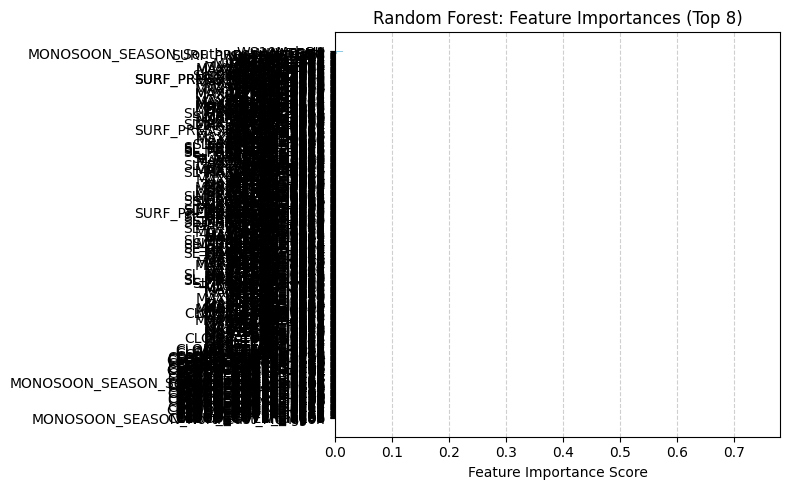

In [ ]:
X_train_sub = X_train
X_test_sub = X_test
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
RANDOM_SEED = 42

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,  # Let the tree grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train_sub, y_train)

# Predict
y_train_pred_rf = rf_model.predict(X_train_sub)
y_test_pred_rf = rf_model.predict(X_test_sub)

print("\n--- Random Forest Evaluation ---")
evaluate(y_train, y_train_pred_rf, label="Train (RF)")
evaluate(y_test, y_test_pred_rf, label="Test (RF)")

importances_rf = rf_model.feature_importances_
feature_names_rf = X_train_sub.columns

importance_df_rf = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Random Forest: Feature Importances (Top 8)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


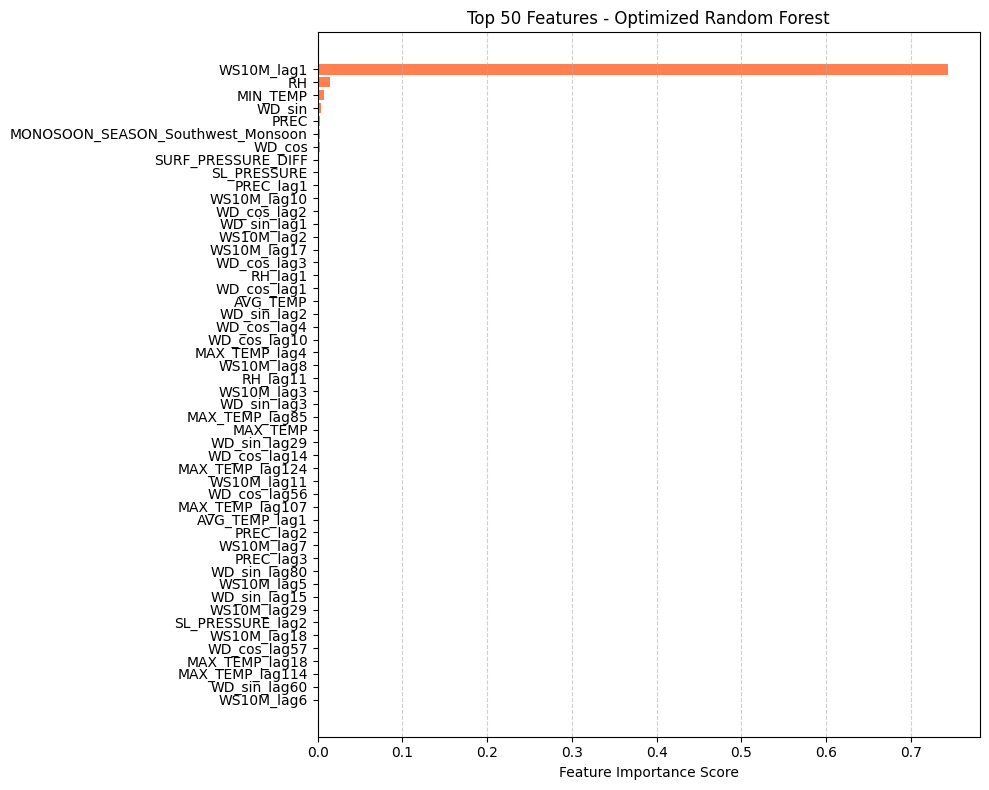

In [ ]:
# Feature Importances
importances_rf_opt = rf_model.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# RF - RANDOM

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters:
{'max_depth': 43, 'max_features': 0.8, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 939}

--- Optimized Random Forest Evaluation ---
Train (RF Optimized) MSE: 0.1817
Train (RF Optimized) RMSE: 0.4263
Train (RF Optimized) MAE: 0.3055
Train (RF Optimized) MAPE: 8.77%
Train (RF Optimized) R²: 0.9279
Test (RF Optimized) MSE: 0.6290
Test (RF Optimized) RMSE: 0.7931
Test (RF Optimized) MAE: 0.6122
Test (RF Optimized) MAPE: 16.98%
Test (RF Optimized) R²: 0.7415


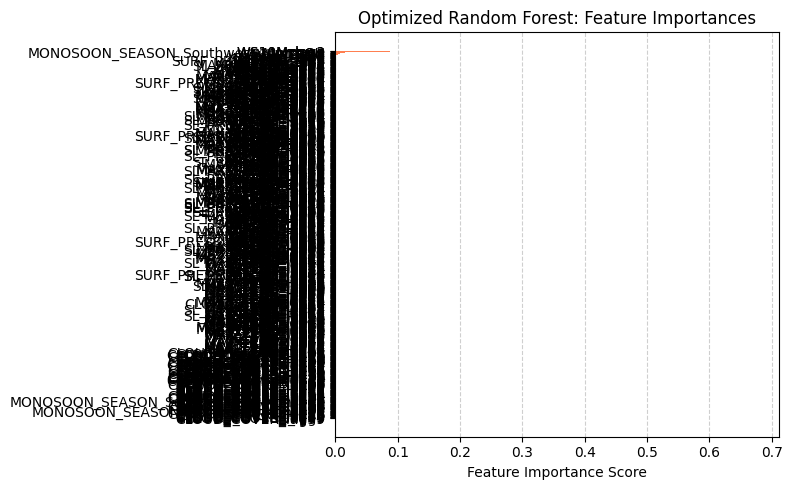

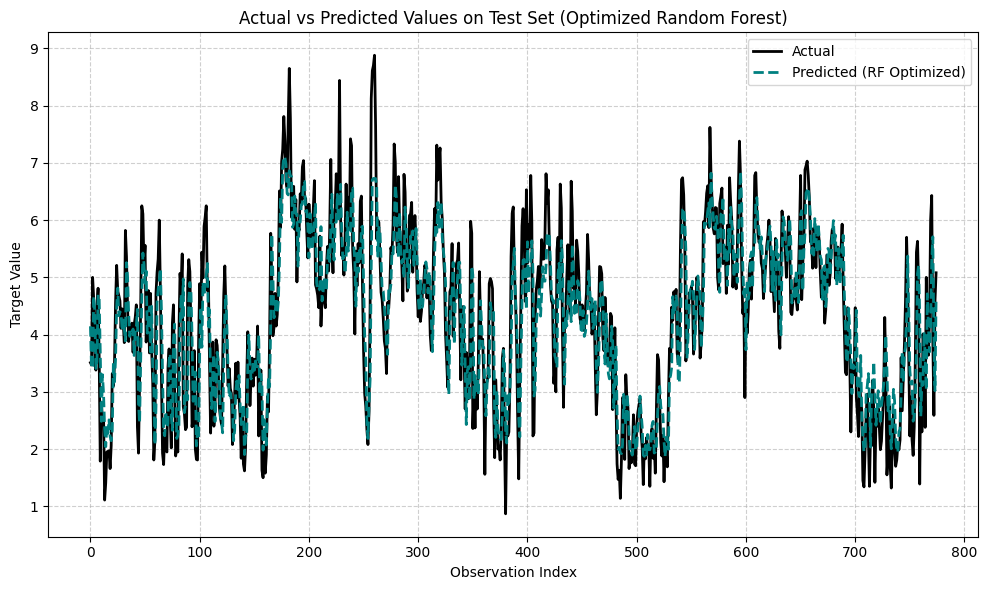

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Hyperparameter space
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 1001),
    'max_depth': randint(3, 51),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 21),
    'max_features': ['sqrt', 'log2', 0.5, 0.8]  # keep categorical options as a list
}

# Initialize model
rf = RandomForestRegressor(random_state=RANDOM_SEED, n_jobs=-1)

# TimeSeriesSplit for temporal data
tscv = TimeSeriesSplit(n_splits=5)

# Random Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train_sub, y_train)

# Best model
best_rf = random_search.best_estimator_
print("\nBest Parameters:")
print(random_search.best_params_)

# Predictions
y_train_pred_rf_opt = best_rf.predict(X_train_sub)
y_test_pred_rf_opt = best_rf.predict(X_test_sub)

# Evaluation
print("\n--- Optimized Random Forest Evaluation ---")
evaluate_metrics(y_train, y_train_pred_rf_opt, label="Train (RF Optimized)")
evaluate_metrics(y_test, y_test_pred_rf_opt, label="Test (RF Optimized)")

# Feature Importances
importances_rf_opt = best_rf.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_rf_opt['Feature'], importance_df_rf_opt['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Optimized Random Forest: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_rf_opt, label='Predicted (RF Optimized)', color='teal', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized Random Forest)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


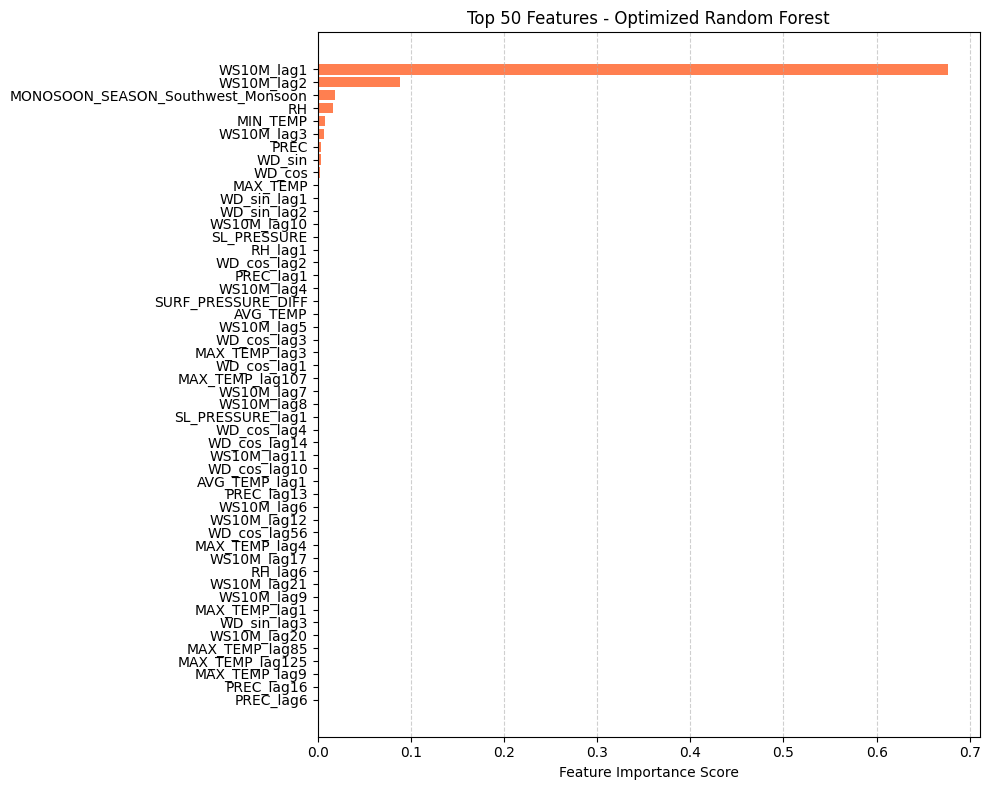

In [ ]:
# Feature Importances
importances_rf_opt = best_rf.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# RF - OPTUNA

[I 2025-07-17 11:58:20,338] A new study created in memory with name: no-name-97bab1e4-2dcc-4c2c-8b12-0670c61ab295
[I 2025-07-17 12:09:26,847] Trial 0 finished with value: 0.6392518302826486 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 0.8}. Best is trial 0 with value: 0.6392518302826486.



Best Trial:
FrozenTrial(number=0, state=1, values=[0.6392518302826486], datetime_start=datetime.datetime(2025, 7, 17, 11, 58, 20, 339518), datetime_complete=datetime.datetime(2025, 7, 17, 12, 9, 26, 847199), params={'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 0.8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=50, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', 0.5, 0.8))}, trial_id=0, value=None)

Best Parameters:
{'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 0.8}

--- Optimized Random Forest Evaluation ---
Train (RF Optimized) MSE: 0.2639
Train (RF Optim

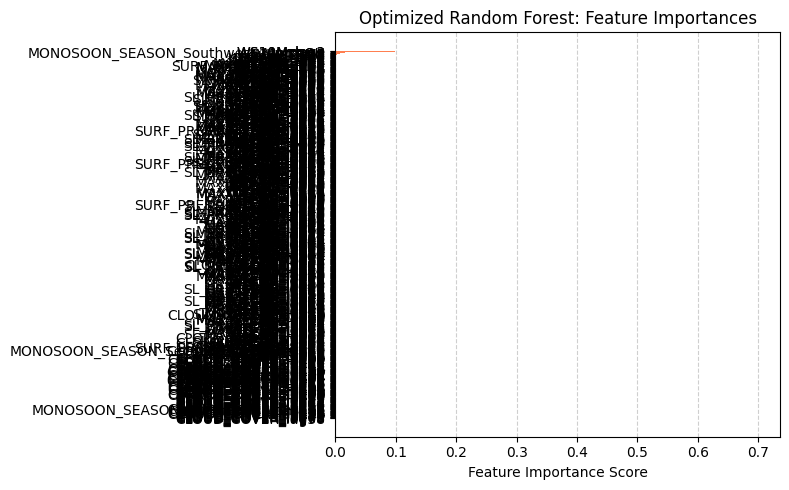

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd



# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Optuna objective function
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, 0.8]),
        'random_state': RANDOM_SEED,
        'n_jobs': -1
    }

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_sub):
        X_t, X_v = X_train_sub.iloc[train_idx], X_train_sub.iloc[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = RandomForestRegressor(**params)
        model.fit(X_t, y_t)
        preds = model.predict(X_v)
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Run Optuna optimization
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.RandomSampler(seed=RANDOM_SEED)
)
study.optimize(rf_objective, n_trials=30, timeout=300)

# Results
print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit model using full training data with best params
best_rf = RandomForestRegressor(**study.best_params)
best_rf.fit(X_train_sub, y_train)

# Predictions
y_train_pred_rf_opt = best_rf.predict(X_train_sub)
y_test_pred_rf_opt = best_rf.predict(X_test_sub)

# Evaluation
print("\n--- Optimized Random Forest Evaluation ---")
evaluate_metrics(y_train, y_train_pred_rf_opt, label="Train (RF Optimized)")
evaluate_metrics(y_test, y_test_pred_rf_opt, label="Test (RF Optimized)")

# Feature Importances
importances_rf_opt = best_rf.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_rf_opt['Feature'], importance_df_rf_opt['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Optimized Random Forest: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


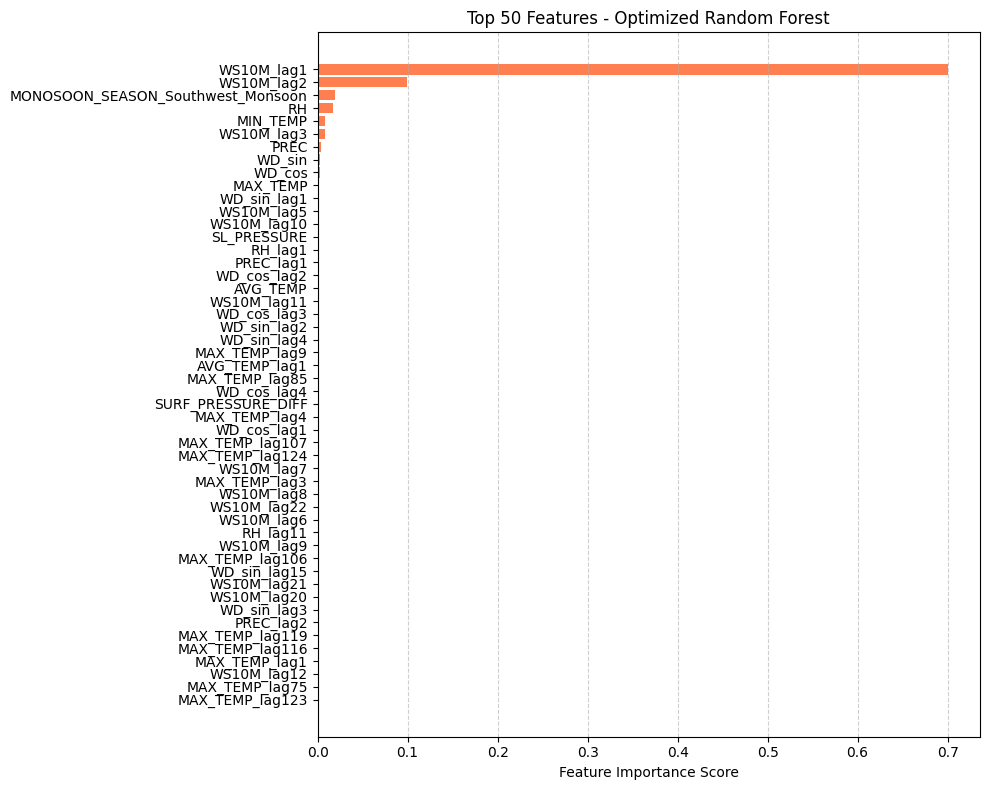

In [ ]:
# Feature Importances
importances_rf_opt = best_rf.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# RF - GRID

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Hyperparameter grid (discrete values for GridSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 0.8]
}

# Initialize model
rf = RandomForestRegressor(random_state=RANDOM_SEED, n_jobs=-1)

# TimeSeriesSplit for temporal data
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Fit search
grid_search.fit(X_train_sub, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("\nBest Parameters:")
print(grid_search.best_params_)

# Predictions
y_train_pred_rf_opt = best_rf.predict(X_train_sub)
y_test_pred_rf_opt = best_rf.predict(X_test_sub)

# Evaluation
print("\n--- Optimized Random Forest Evaluation ---")
evaluate_metrics(y_train, y_train_pred_rf_opt, label="Train (RF Optimized)")
evaluate_metrics(y_test, y_test_pred_rf_opt, label="Test (RF Optimized)")

# Feature Importances
importances_rf_opt = best_rf.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_rf_opt['Feature'], importance_df_rf_opt['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Optimized Random Forest: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_rf_opt, label='Predicted (RF Optimized)', color='teal', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized Random Forest)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [ ]:
# Feature Importances
importances_rf_opt = best_rf.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# XGB

# xgb- oRIGINAL


--- XGBoost Evaluation ---
Train (XGB) MSE: 0.0096
Train (XGB) RMSE: 0.0979
Train (XGB) MAE: 0.0747
Train (XGB) MAPE: 2.08%
Train (XGB) R²: 0.9962
Test (XGB) MSE: 0.6178
Test (XGB) RMSE: 0.7860
Test (XGB) MAE: 0.6078
Test (XGB) MAPE: 16.73%
Test (XGB) R²: 0.7462


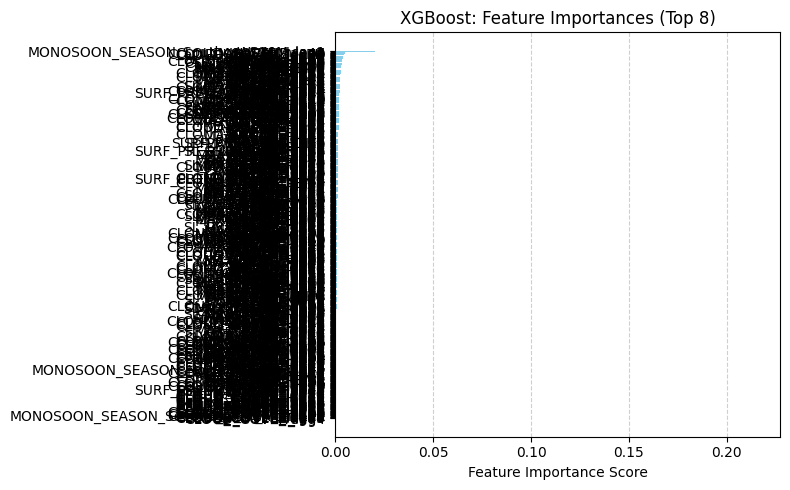

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Use top 8 features


# Set seed for reproducibility
RANDOM_SEED = 42

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,           # Typical default, you can tune this
    learning_rate=0.1,     # Typical default, you can tune this
    subsample=1,
    colsample_bytree=1,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_train_sub, y_train)

# Predict
y_train_pred_xgb = xgb_model.predict(X_train_sub)
y_test_pred_xgb = xgb_model.predict(X_test_sub)

print("\n--- XGBoost Evaluation ---")
evaluate(y_train, y_train_pred_xgb, label="Train (XGB)")
evaluate(y_test, y_test_pred_xgb, label="Test (XGB)")

# Get feature importances
importances_xgb = xgb_model.feature_importances_
feature_names_xgb = X_train_sub.columns

importance_df_xgb = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('XGBoost: Feature Importances (Top 8)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


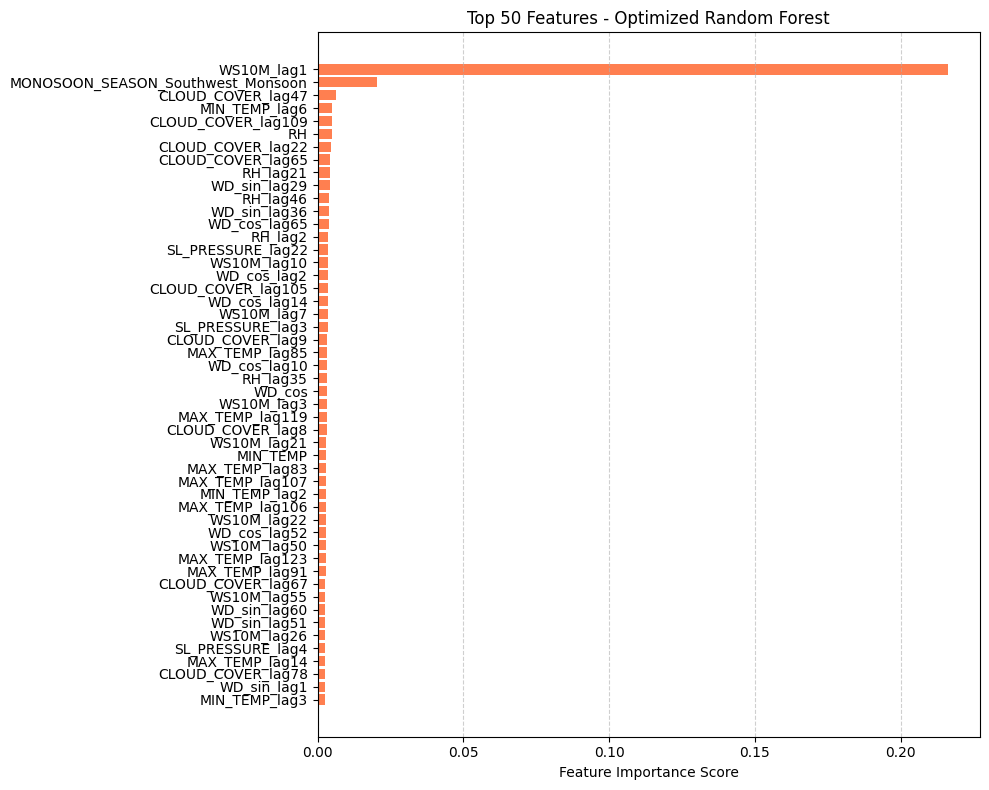

In [ ]:
# Feature Importances
importances_rf_opt = xgb_model.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# xgb- rAOM

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters:
{'colsample_bytree': np.float64(0.8777755692715243), 'gamma': np.float64(0.06863944964748674), 'learning_rate': np.float64(0.0253959819657586), 'max_depth': 4, 'min_child_weight': 9, 'n_estimators': 745, 'subsample': np.float64(0.7282672852414551)}

--- Optimized XGBoost Evaluation ---
Train (XGB Optimized) MSE: 0.1048
Train (XGB Optimized) RMSE: 0.3237
Train (XGB Optimized) MAE: 0.2550
Train (XGB Optimized) MAPE: 7.19%
Train (XGB Optimized) R²: 0.9584
Test (XGB Optimized) MSE: 0.5681
Test (XGB Optimized) RMSE: 0.7537
Test (XGB Optimized) MAE: 0.5793
Test (XGB Optimized) MAPE: 15.81%
Test (XGB Optimized) R²: 0.7666


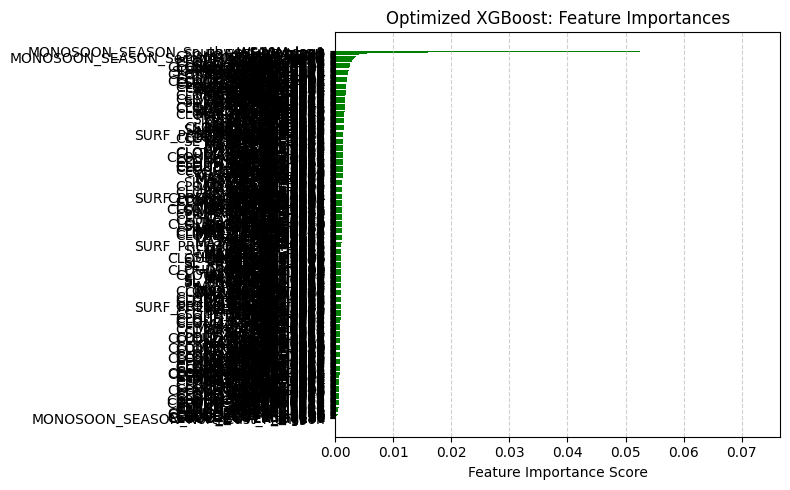

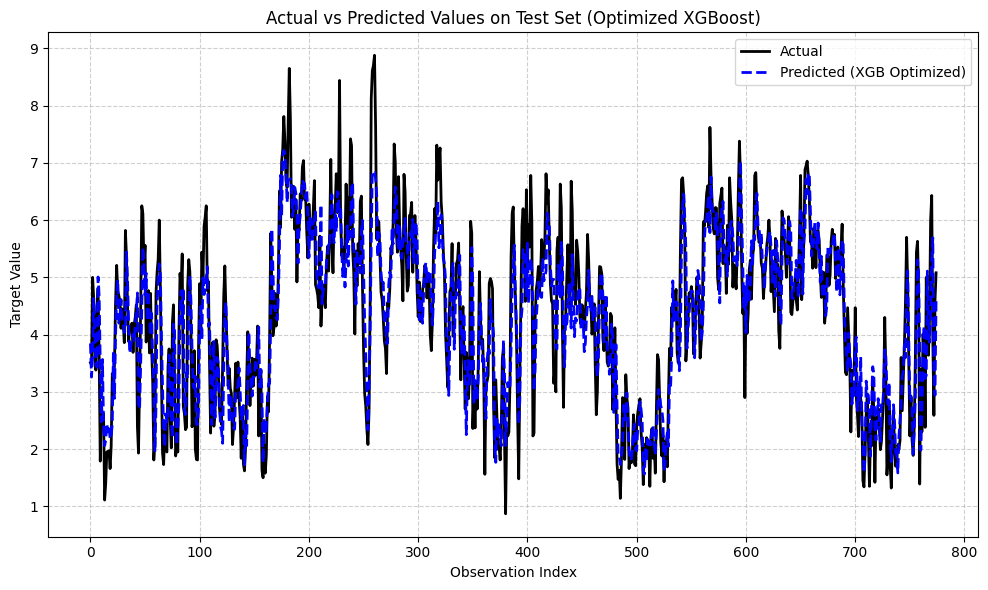

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import randint, uniform

# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Evaluation Function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Hyperparameter distribution for XGBoost
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.3),
    'min_child_weight': randint(1, 10)
}

# Initialize model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Random Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train_sub, y_train)

# Best model
best_xgb = random_search.best_estimator_
print("\nBest Parameters:")
print(random_search.best_params_)

# Predictions
y_train_pred_xgb_opt = best_xgb.predict(X_train_sub)
y_test_pred_xgb_opt = best_xgb.predict(X_test_sub)

# Evaluation
print("\n--- Optimized XGBoost Evaluation ---")
evaluate_metrics(y_train, y_train_pred_xgb_opt, label="Train (XGB Optimized)")
evaluate_metrics(y_test, y_test_pred_xgb_opt, label="Test (XGB Optimized)")

# Feature Importances
importances_xgb_opt = best_xgb.feature_importances_
importance_df_xgb_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_xgb_opt
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_xgb_opt['Feature'], importance_df_xgb_opt['Importance'], color='green')
plt.xlabel('Feature Importance Score')
plt.title('Optimized XGBoost: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_xgb_opt, label='Predicted (XGB Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized XGBoost)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


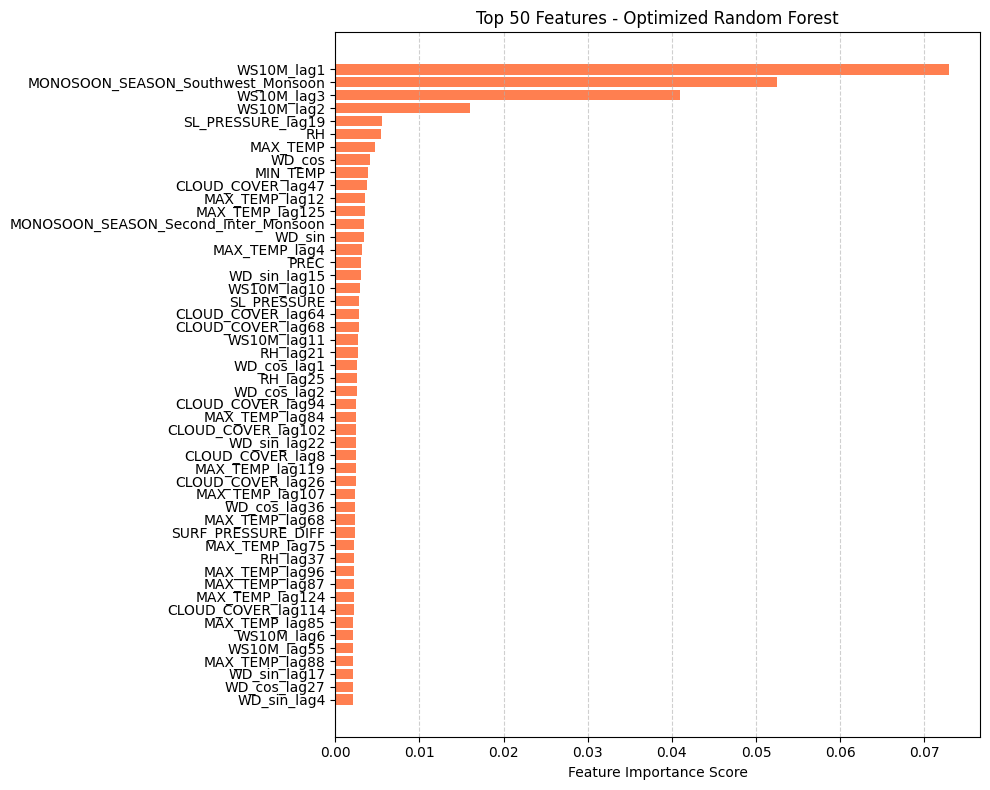

In [ ]:
# Feature Importances
importances_rf_opt = best_xgb.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# xgb - *GRID*

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Use top 8 features
X_train_sub = X_train
X_test_sub = X_test

# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1],
}

# Initialize XGBoost model
xgb = XGBRegressor(
    objective='reg:squarederror',  # Important to avoid warnings
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Time series-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train_sub, y_train)

# Best XGB model
best_xgb = grid_search.best_estimator_
print("\nBest Parameters:")
print(grid_search.best_params_)

# Predict
y_train_pred_xgb_opt = best_xgb.predict(X_train_sub)
y_test_pred_xgb_opt = best_xgb.predict(X_test_sub)

# Evaluation
print("\n--- Optimized XGBoost Evaluation ---")
evaluate_metrics(y_train, y_train_pred_xgb_opt, label="Train (XGB Optimized)")
evaluate_metrics(y_test, y_test_pred_xgb_opt, label="Test (XGB Optimized)")

# Feature Importances
importances_xgb_opt = best_xgb.feature_importances_
importance_df_xgb_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_xgb_opt
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_xgb_opt['Feature'], importance_df_xgb_opt['Importance'], color='orange')
plt.xlabel('Feature Importance Score')
plt.title('Optimized XGBoost: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_xgb_opt, label='Predicted (XGB Optimized)', color='green', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized XGBoost)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importances
importances_rf_opt = best_xgb.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importances
importances_rf_opt = best_xgb.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# xgb - *OPTUNA*

[I 2025-07-18 03:46:51,495] A new study created in memory with name: no-name-ebb5e8b7-b1e7-4488-a578-a26c81951e5d
[I 2025-07-18 03:48:49,020] Trial 0 finished with value: 0.8026186610092179 and parameters: {'n_estimators': 437, 'max_depth': 20, 'learning_rate': 0.22227824312530747, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 0.04679835610086079, 'min_child_weight': 1}. Best is trial 0 with value: 0.8026186610092179.
[I 2025-07-18 03:50:41,923] Trial 1 finished with value: 0.7387643818760593 and parameters: {'n_estimators': 880, 'max_depth': 13, 'learning_rate': 0.21534104756085318, 'subsample': 0.5102922471479012, 'colsample_bytree': 0.9849549260809971, 'gamma': 0.2497327922401265, 'min_child_weight': 3}. Best is trial 1 with value: 0.7387643818760593.
[I 2025-07-18 03:51:56,913] Trial 2 finished with value: 0.6661754226298705 and parameters: {'n_estimators': 263, 'max_depth': 6, 'learning_rate': 0.09823025045826593, 'subsample': 0.762378215816119,


Best Trial:
FrozenTrial(number=2, state=1, values=[0.6661754226298705], datetime_start=datetime.datetime(2025, 7, 18, 3, 50, 41, 927124), datetime_complete=datetime.datetime(2025, 7, 18, 3, 51, 56, 913663), params={'n_estimators': 263, 'max_depth': 6, 'learning_rate': 0.09823025045826593, 'subsample': 0.762378215816119, 'colsample_bytree': 0.7159725093210578, 'gamma': 0.08736874205941257, 'min_child_weight': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=0.3, log=False, low=0.0, step=None), 'min_child_weight': IntDistribution(high=10, log=False, low=1, step=1)}, tr

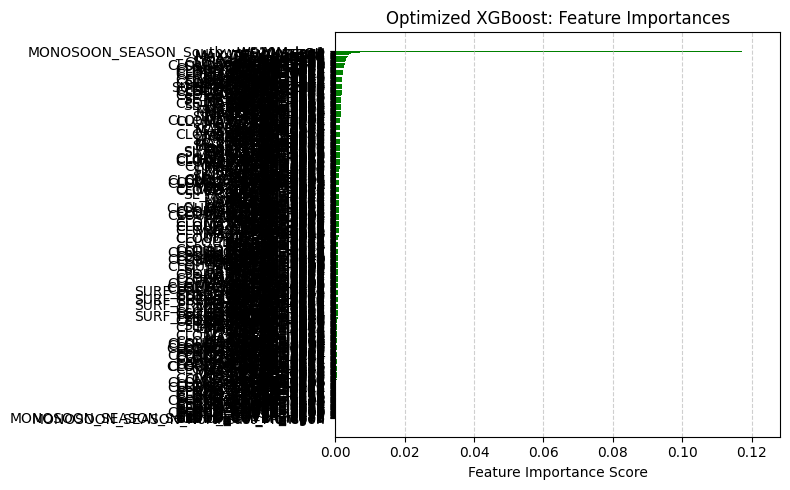

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Use top 8 features
X_train_sub = X_train
X_test_sub = X_test

# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Evaluation function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Optuna objective function for XGBoost
def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': RANDOM_SEED,
        'n_jobs': -1,
        'objective': 'reg:squarederror'
    }

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_sub):
        X_t, X_v = X_train_sub.iloc[train_idx], X_train_sub.iloc[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = XGBRegressor(**params)
        model.fit(X_t, y_t, verbose=0)
        preds = model.predict(X_v)
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Run Optuna optimization
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.RandomSampler(seed=RANDOM_SEED)
)
study.optimize(xgb_objective, n_trials=30, timeout=300)

# Results
print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit XGBoost model with best params
best_xgb = XGBRegressor(**study.best_params)
best_xgb.fit(X_train_sub, y_train)

# Predictions
y_train_pred_xgb_opt = best_xgb.predict(X_train_sub)
y_test_pred_xgb_opt = best_xgb.predict(X_test_sub)

# Evaluation
print("\n--- Optimized XGBoost Evaluation ---")
evaluate_metrics(y_train, y_train_pred_xgb_opt, label="Train (XGB Optimized)")
evaluate_metrics(y_test, y_test_pred_xgb_opt, label="Test (XGB Optimized)")

# Feature Importances
importances_xgb_opt = best_xgb.feature_importances_
importance_df_xgb_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_xgb_opt
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df_xgb_opt['Feature'], importance_df_xgb_opt['Importance'], color='green')
plt.xlabel('Feature Importance Score')
plt.title('Optimized XGBoost: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


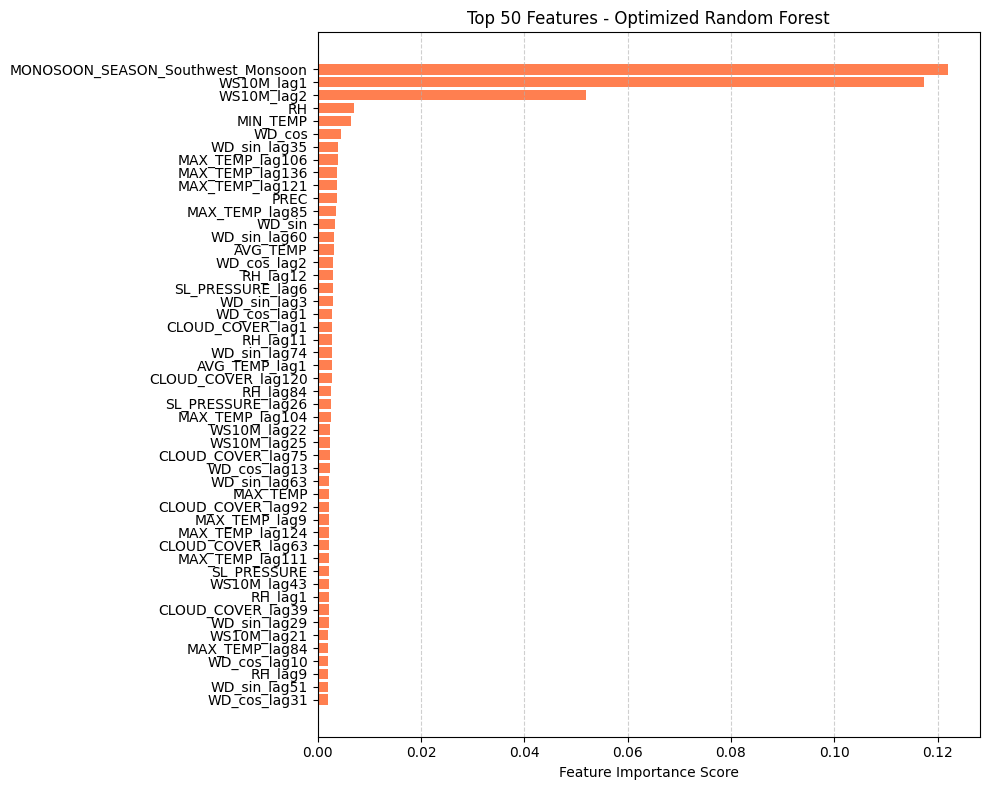

In [ ]:
# Feature Importances
importances_rf_opt = best_xgb.feature_importances_
importance_df_rf_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_rf_opt
}).sort_values(by='Importance', ascending=False)

# Select top 50 features
top_50_features = importance_df_rf_opt.head(50)

# Plot top 50 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='coral')
plt.xlabel('Feature Importance Score')
plt.title('Top 50 Features - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
